In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scienceplots
#import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from pathlib import Path
import os

# Apply the default theme
#sns.set_theme()
#sns.set_style('white')
#sns.set_context("paper", font_scale = 2)
#plt.style.use(['science','no-latex'])
print('Pandas v', pd.__version__)

Pandas v 1.3.5


# Configurations

In [8]:
# Configurations 
#latex_dir = Path(r"C:\Users\3057550\OneDrive - Queen's University Belfast\ECIT\Research\AI_Cybersecurity\Teams Files\Papers\In preparation\NLP for SQLi detection\latex\hybrid_nlp_journal")
#latex_dir = Path(r"C:\Users\kasim\OneDrive - Queen's University Belfast\ECIT\Research\AI_Cybersecurity\Teams Files\Papers\In preparation\NLP for SQLi detection\latex\hybrid_nlp_journal")
latex_dir = Path(r'C:\Users\kasim\Documents\GitHub\dpu-sqli-detection')
SAVE_OUTPUTS = False

In [9]:
# Notes about result files:

main_folder = Path('../')


results_file = main_folder / 'results' / 'results_230422_222732.csv' # temp - all
print(results_file.is_file())

True


In [10]:
methods={}

methods['classic_ml'] = ['naive_bayes', 'xgboost', 'svm']

method_categories = [method_cat for method_cat in methods]

# Load and Setup Data

In [11]:
# Rename Columns and Index properly (for latex tables and figures)
def rename_table_labels(df_bad_labeled):
    column_mapper = {
        "accuracy": "Accuracy", 
        "precision": "Precision",
        "recall":"Recall",
        "f1_score":"F1",
        "tn":"TN",
        "tp":"TP",
        "fn":"FN",
        "fp":"FP",
        "train_size":"Train Size",
        "test_size":"Test Size",
        "dataset":"Dataset",
        "train_time":"Training Time (ms)",
        "pred_time":"Inference Time (ms)",
        "method":"Method"
        }
    method_mapper = {
        "proposed": "Proposed",
        "bow_nb": "BoW NB",
        "bow_xgboost": "BoW XGBoost", 
        'bow_svm':'BoW SVM',
        'boc_nb': 'BoC NB', 
        'boc_xgboost':'BoC XGBoost', 
        'boc_svm': 'BoC SVM',
        'tfidf_nb': 'TF-IDF NB', 
        'tfidf_xgboost': 'TF-IDF XGBoost', 
        'tfidf_svm': 'TF-IDF SVM', 
        'tfidfng_nb': 'TF-IDF ngram NB',
        'tfidfng_xgboost': 'TF-IDF ngram XGBoost', 
        'tfidfng_svm': 'TF-IDF ngram SVM',
        'xgboost tf-idf': 'TF-IDF XGBoost', 
        'naive_bayes tf-idf': 'TF-IDF NB', 
        'svm tf-idf': 'TF-IDF SVM', 
        'xgboost tf-idf_ngram': 'TF-IDF ngram XGBoost', 
        'naive_bayes tf-idf_ngram': 'TF-IDF ngram NB', 
        'svm tf-idf_ngram':'TF-IDF ngram SVM', 
        'xgboost bag_of_characters':'BoC XGBoost', 
        'naive_bayes bag_of_characters': 'BoC NB', 
        'svm bag_of_characters': 'BoC SVM'
    }
    
    #df_new_labeled = df_bad_labeled.rename(columns=column_mapper, index=index_mapper)
    df_new_labeled = df_bad_labeled.rename(columns=column_mapper)
    #df_new_labeled.index.rename("Method",inplace=True)
    df_new_labeled=df_new_labeled.replace({"Method": method_mapper})
    return df_new_labeled

## Function definitions

In [12]:
def my_plot_errorbar(df_all, ax, metric='f1', width=0.9, offset=0, order_dict=None):
  
  
  # Create new column containing indices
  #df_all['index'] = df_all['model'].map(order_dict)
  # Sort DataFrame based on new column
  #df_all = df_all.sort_values(by='index').reset_index(drop=True)
  
  #df_tmp = df_all.copy()
  #display(df_all)
  ordering = [(v, i) for v, i in order_dict.items()]
  positions = [i for v,i in sorted(ordering)]
  positions

  df_all.boxplot(by='model', column=[metric], ax=ax, positions=positions, showfliers=False)
  # col_names = df_small.columns
  # #row_names = df_small.Method
  
  # colors = df_small.loc[:,'color'].values
  # #colors = [list(colors[i][0]) for i in range(len(colors))]
  # colors = [list(colors[i]) for i in range(len(colors))]

  # bar_vals = df_small.loc[:][metric].values.tolist()
  # bar_tics = df_small.loc[:]['Method'].values.tolist()
  # bar_width = width

  # bar_container = ax.bar(x=np.arange(len(bar_tics))+offset, height=bar_vals, 
  #                         width=bar_width,color=colors, tick_label=bar_tics)
  # ax.bar_label(bar_container, fmt='%0.4f', padding=0.8, rotation=90)
  
  # #ax.tick_params(axis='x', rotation=70, ha="right")
  plt.setp(ax.get_xticklabels(), rotation=70, ha="right", rotation_mode="default")
  plt.setp(ax.get_xticklabels(),  va="center", rotation_mode="anchor")
  ax.tick_params(axis='x', which='both', bottom=False, top=False)
  ax.tick_params(axis='y', which='both', right=False)
  # # Hide the right and top spines
  ax.spines.right.set_visible(False)
  ax.spines.top.set_visible(False)

In [13]:
#fig, ax = plt.subplots(figsize=(5, 5))
def my_plot_bar(df_small, ax, metric='f1', width=0.9, offset=0):
  col_names = df_small.columns
  #row_names = df_small.Method
  
  colors = df_small.loc[:,'color'].values
  #colors = [list(colors[i][0]) for i in range(len(colors))]
  colors = [list(colors[i]) for i in range(len(colors))]

  bar_vals = df_small.loc[:][metric].values.tolist()
  bar_tics = df_small.loc[:]['Method'].values.tolist()
  bar_width = width

  bar_container = ax.bar(x=np.arange(len(bar_tics))+offset, height=bar_vals, 
                          width=bar_width,color=colors, tick_label=bar_tics)
  ax.bar_label(bar_container, fmt='%0.4f', padding=0.8, rotation=90)
  
  #ax.tick_params(axis='x', rotation=70, ha="right")
  plt.setp(ax.get_xticklabels(), rotation=70, ha="right", rotation_mode="default")
  plt.setp(ax.get_xticklabels(),  va="center", rotation_mode="anchor")
  ax.tick_params(axis='x', which='both', bottom=False, top=False)
  ax.tick_params(axis='y', which='both', right=False)
  # Hide the right and top spines
  ax.spines.right.set_visible(False)
  ax.spines.top.set_visible(False)

  #ax.set(ylim=(0.8, 1))




In [14]:
#fig, ax = plt.subplots(figsize=(5, 5))
def my_plot_twin_bar(df_small, ax, metric=['F1','Inference Time (ms)']):
    width = 0.3
    offset = 0.3
    my_plot_bar(df_small, ax, metric[0],width=width,offset=0)

    ax2 = ax.twinx()
    ax2.tick_params(axis='x', which='both', bottom=False, top=False)
    ax2.spines.top.set_visible(False)
    # col_names = df_small.columns
    # row_names = df_small.index
    
    colors = df_small.loc[:,'color'].values
    #colors = [list(colors[i][0]) for i in range(len(colors))]
    colors = [list(colors[i]) for i in range(len(colors))]
    new_colors = np.asarray(colors)/[3.2, 3.2, 3.2, 1]
    new_colors = new_colors.sum(axis=1)-1
    new_colors = np.expand_dims(new_colors, axis=0)
    new_colors = np.tile(new_colors.transpose(),(1,4))
    new_colors[:,3] =1
    colors = new_colors.tolist()
    

    bar_vals = df_small.loc[:][metric[1]].values.tolist()
    bar_tics = df_small.loc[:]['Method'].values.tolist()
    bar_width = width

    bar_container = ax2.bar(x=np.arange(len(bar_tics))+offset, height=bar_vals, 
                           width=bar_width,color=colors, tick_label=bar_tics)
    ax2.bar_label(bar_container, fmt='%0.4fms', padding=0.8, rotation=90)
    
    # #ax.tick_params(axis='x', rotation=70, ha="right")
    # plt.setp(ax.get_xticklabels(), rotation=70, ha="right", rotation_mode="default")
    # plt.setp(ax.get_xticklabels(),  va="center", rotation_mode="anchor")
    # ax.tick_params(axis='x', which='both', bottom=False, top=False)
    # ax.tick_params(axis='y', which='both', right=False)
    # # Hide the right and top spines
    # ax.spines.right.set_visible(False)
    # ax.spines.top.set_visible(False)

    return ax, ax2

    #ax.set(ylim=(0.8, 1))




## Read and preprocess dataset

In [15]:
#%%script echo skip
df_all = pd.read_csv(results_file)
df_all.drop(columns=['method'],inplace=True)


In [16]:
# Define a custom function that returns the first element if it's non-numeric, and the mean if it's numeric
def custom_agg(x):
    if pd.api.types.is_numeric_dtype(x):
        return x.mean()
    else:
        return x.iloc[0]

In [17]:
df = df_all.set_index('model').groupby('model').agg(custom_agg).copy()
df.reset_index(inplace=True)

In [18]:
df

model  accuracy  precision    recall  f1_score  \
0            AdaBoostClassifier  0.993891   0.996450  0.987083  0.991743   
1             BaggingClassifier  0.995132   0.997213  0.989667  0.993422   
2        DecisionTreeClassifier  0.988206   0.995638  0.972511  0.983932   
3          ExtraTreesClassifier  0.997452   0.999644  0.993496  0.996560   
4          KNeighborsClassifier  0.980644   0.981638  0.965976  0.973739   
5                     LinearSVC  0.997615   0.999558  0.994026  0.996784   
6            LogisticRegression  0.994855   0.998796  0.987345  0.993037   
7                 MLPClassifier  0.990640   0.998290  0.976499  0.987269   
8                 MultinomialNB  0.920222   0.831090  0.985641  0.901780   
9               NearestCentroid  0.956093   0.989034  0.891704  0.937836   
10                        NuSVC  0.935348   0.999682  0.826279  0.904730   
11           OneVsOneClassifier  0.997125   0.999159  0.993105  0.996121   
12          OneVsRestClassifier  0.997125   0.999159  0.993105  0.996121   
13  PassiveAggressiveClassifier  0.997746   0.999029  0.994904  0.996962   
14                   Perceptron  0.996847   0.996391  0.995122  0.995755   
15    RadiusNeighborsClassifier  0.825172   0.688492  0.967084  0.804336   
16              RidgeClassifier  0.996831   0.999468  0.992003  0.995721   
17                SGDClassifier  0.996259   0.999423  0.990511  0.994946   
18                       SVC-GC  0.996080   0.999378  0.990070  0.994702   
19                      SVM_RBF  0.997060   0.999424  0.992662  0.996031   
20                      XGBoost  0.997125   0.999159  0.993105  0.996121   

        tp      tn     fp     fn feature_method   seed  split_ratio  \
0   2245.3  3839.3    8.0   29.4   tf-idf_ngram  152.3          0.2   
1   2251.2  3841.0    6.3   23.5   tf-idf_ngram  152.3          0.2   
2   2212.2  3837.6    9.7   62.5   tf-idf_ngram  152.3          0.2   
3   2259.9  3846.5    0.8   14.8   tf-idf_ngram  152.3          0.2   
4   2197.3  3806.2   41.1   77.4   tf-idf_ngram  152.3          0.2   
5   2261.1  3846.3    1.0   13.6   tf-idf_ngram  152.3          0.2   
6   2245.9  3844.6    2.7   28.8   tf-idf_ngram  152.3          0.2   
7   2221.2  3843.5    3.8   53.5   tf-idf_ngram  152.3          0.2   
8   2242.0  3391.6  455.7   32.7   tf-idf_ngram  152.3          0.2   
9   2028.4  3824.8   22.5  246.3   tf-idf_ngram  152.3          0.2   
10  1879.5  3846.7    0.6  395.2   tf-idf_ngram  152.3          0.2   
11  2259.0  3845.4    1.9   15.7   tf-idf_ngram  152.3          0.2   
12  2259.0  3845.4    1.9   15.7   tf-idf_ngram  152.3          0.2   
13  2263.1  3845.1    2.2   11.6   tf-idf_ngram  152.3          0.2   
14  2263.6  3839.1    8.2   11.1   tf-idf_ngram  152.3          0.2   
15  2199.8  2851.9  995.4   74.9   tf-idf_ngram  152.3          0.2   
16  2256.5  3846.1    1.2   18.2   tf-idf_ngram  152.3          0.2   
17  2253.1  3846.0    1.3   21.6   tf-idf_ngram  152.3          0.2   
18  2252.1  3845.9    1.4   22.6   tf-idf_ngram  152.3          0.2   
19  2258.0  3846.0    1.3   16.7   tf-idf_ngram  152.3          0.2   
20  2259.0  3845.4    1.9   15.7   tf-idf_ngram  152.3          0.2   

    train_size  test_size  extraction_time  feature_size  train_time  \
0      24487.0     6122.0         3.410406       28816.5    0.926553   
1      24487.0     6122.0         3.410406       28816.5    2.915317   
2      24487.0     6122.0         3.410406       28816.5    0.074957   
3      24487.0     6122.0         3.410406       28816.5    0.770228   
4      24487.0     6122.0         3.410406       28816.5    0.000296   
5      24487.0     6122.0         3.410406       28816.5    0.008926   
6      24487.0     6122.0         3.410406       28816.5    0.030017   
7      24487.0     6122.0         3.410406       28816.5    2.254671   
8      24487.0     6122.0         3.410406       28816.5    0.000801   
9      24487.0     6122.0         3.410406       28816.5    0.001009  

In [19]:
df_all

accuracy  precision    recall  f1_score    tp    tn   fp  fn  \
0    0.997223   0.999114  0.993392  0.996245  2255  3850    2  15   
1    0.919961   0.828413  0.988987  0.901606  2245  3387  465  25   
2    0.998040   1.000000  0.994714  0.997350  2258  3852    0  12   
3    0.992649   0.999103  0.981057  0.989998  2227  3850    2  43   
4    0.983665   0.983943  0.971806  0.977837  2206  3816   36  64   
..        ...        ...       ...       ...   ...   ...  ...  ..   
205  0.996733   0.996528  0.994801  0.995663  2296  3806    8  12   
206  0.995263   1.000000  0.987435  0.993678  2279  3814    0  29   
207  0.997223   0.998694  0.993934  0.996308  2294  3811    3  14   
208  0.997223   1.000000  0.992634  0.996304  2291  3814    0  17   
209  0.997223   1.000000  0.992634  0.996304  2291  3814    0  17   

    feature_method                        model  seed  split_ratio  \
0     tf-idf_ngram                      XGBoost    13          0.2   
1     tf-idf_ngram                MultinomialNB    13          0.2   
2     tf-idf_ngram                      SVM_RBF    13          0.2   
3     tf-idf_ngram                MLPClassifier    13          0.2   
4     tf-idf_ngram         KNeighborsClassifier    13          0.2   
..             ...                          ...   ...          ...   
205   tf-idf_ngram                   Perceptron   666          0.2   
206   tf-idf_ngram           LogisticRegression   666          0.2   
207   tf-idf_ngram  PassiveAggressiveClassifier   666          0.2   
208   tf-idf_ngram          OneVsRestClassifier   666          0.2   
209   tf-idf_ngram           OneVsOneClassifier   666          0.2   

     train_size  test_size  extraction_time  feature_size  train_time  \
0         24487       6122         3.245692         29157    0.120402   
1         24487       6122         3.245692         29157    0.000811   
2         24487       6122         3.245692         29157    6.644555   
3         24487       6122         3.245692         29157    2.236650   
4         24487       6122         3.245692         29157    0.000305   
..          ...        ...              ...           ...         ...   
205       24487       6122         3.394465         29338    0.005128   
206       24487       6122         3.394465         29338    0.027323   
207       24487       6122         3.394465         29338    0.007224   
208       24487       6122         3.394465         29338    0.131853   
209       24487       6122         3.394465         29338    0.129272   

     threshold  pred_time     dataset  
0          0.5   0.001180  SQLiV3.tsv  
1          0.5   0.000824  SQLiV3.tsv  
2          0.5   1.825191  SQLiV3.tsv  
3          0.5   0.005329  SQLiV3.tsv  
4          0.5  31.312970  SQLiV3.tsv  
..         ...        ...         ...  
205        0.5   0.000318  SQLiV3.tsv  
206        0.5   0.000312  SQLiV3.tsv  
207        0.5   0.000315  SQLiV3.tsv  
208        0.5   0.001311  SQLiV3.tsv  
209        0.5   0.002257  SQLiV3.tsv  

[210 rows x 20 columns]

### Preprocess datasets

In [20]:
for index, row in df.iterrows():
  df.loc[index,'category'] = 'classic_ml'
  #for method_cat in methods.keys():
  #  if df.loc[index, 'model'] in methods[method_cat]:
  #   df.loc[index,'category'] = method_cat

In [21]:
for index, row in df.iterrows():
  print(df.loc[index, 'model'])
  if df.loc[index,'category'] == 'classic_ml':
    df.loc[index,'Method'] = df.loc[index,'model'] #+ ' ' + df.loc[index, 'feature_method']
  else:
    df.loc[index,'Method'] = df.loc[index,'model']

#df.set_index('index_col', inplace=True)

AdaBoostClassifier
BaggingClassifier
DecisionTreeClassifier
ExtraTreesClassifier
KNeighborsClassifier
LinearSVC
LogisticRegression
MLPClassifier
MultinomialNB
NearestCentroid
NuSVC
OneVsOneClassifier
OneVsRestClassifier
PassiveAggressiveClassifier
Perceptron
RadiusNeighborsClassifier
RidgeClassifier
SGDClassifier
SVC-GC
SVM_RBF
XGBoost


In [22]:
#df['index_col'] = df['model'].str.cat(df['feature_method'], sep=' ')
#df.set_index('index_col', inplace=True)

In [23]:
df

model  accuracy  precision    recall  f1_score  \
0            AdaBoostClassifier  0.993891   0.996450  0.987083  0.991743   
1             BaggingClassifier  0.995132   0.997213  0.989667  0.993422   
2        DecisionTreeClassifier  0.988206   0.995638  0.972511  0.983932   
3          ExtraTreesClassifier  0.997452   0.999644  0.993496  0.996560   
4          KNeighborsClassifier  0.980644   0.981638  0.965976  0.973739   
5                     LinearSVC  0.997615   0.999558  0.994026  0.996784   
6            LogisticRegression  0.994855   0.998796  0.987345  0.993037   
7                 MLPClassifier  0.990640   0.998290  0.976499  0.987269   
8                 MultinomialNB  0.920222   0.831090  0.985641  0.901780   
9               NearestCentroid  0.956093   0.989034  0.891704  0.937836   
10                        NuSVC  0.935348   0.999682  0.826279  0.904730   
11           OneVsOneClassifier  0.997125   0.999159  0.993105  0.996121   
12          OneVsRestClassifier  0.997125   0.999159  0.993105  0.996121   
13  PassiveAggressiveClassifier  0.997746   0.999029  0.994904  0.996962   
14                   Perceptron  0.996847   0.996391  0.995122  0.995755   
15    RadiusNeighborsClassifier  0.825172   0.688492  0.967084  0.804336   
16              RidgeClassifier  0.996831   0.999468  0.992003  0.995721   
17                SGDClassifier  0.996259   0.999423  0.990511  0.994946   
18                       SVC-GC  0.996080   0.999378  0.990070  0.994702   
19                      SVM_RBF  0.997060   0.999424  0.992662  0.996031   
20                      XGBoost  0.997125   0.999159  0.993105  0.996121   

        tp      tn     fp     fn feature_method  ...  train_size  test_size  \
0   2245.3  3839.3    8.0   29.4   tf-idf_ngram  ...     24487.0     6122.0   
1   2251.2  3841.0    6.3   23.5   tf-idf_ngram  ...     24487.0     6122.0   
2   2212.2  3837.6    9.7   62.5   tf-idf_ngram  ...     24487.0     6122.0   
3   2259.9  3846.5    0.8   14.8   tf-idf_ngram  ...     24487.0     6122.0   
4   2197.3  3806.2   41.1   77.4   tf-idf_ngram  ...     24487.0     6122.0   
5   2261.1  3846.3    1.0   13.6   tf-idf_ngram  ...     24487.0     6122.0   
6   2245.9  3844.6    2.7   28.8   tf-idf_ngram  ...     24487.0     6122.0   
7   2221.2  3843.5    3.8   53.5   tf-idf_ngram  ...     24487.0     6122.0   
8   2242.0  3391.6  455.7   32.7   tf-idf_ngram  ...     24487.0     6122.0   
9   2028.4  3824.8   22.5  246.3   tf-idf_ngram  ...     24487.0     6122.0   
10  1879.5  3846.7    0.6  395.2   tf-idf_ngram  ...     24487.0     6122.0   
11  2259.0  3845.4    1.9   15.7   tf-idf_ngram  ...     24487.0     6122.0   
12  2259.0  3845.4    1.9   15.7   tf-idf_ngram  ...     24487.0     6122.0   
13  2263.1  3845.1    2.2   11.6   tf-idf_ngram  ...     24487.0     6122.0   
14  2263.6  3839.1    8.2   11.1   tf-idf_ngram  ...     24487.0     6122.0   
15  2199.8  2851.9  995.4   74.9   tf-idf_ngram  ...     24487.0     6122.0   
16  2256.5  3846.1    1.2   18.2   tf-idf_ngram  ...     24487.0     6122.0   
17  2253.1  3846.0    1.3   21.6   tf-idf_ngram  ...     24487.0     6122.0   
18  2252.1  3845.9    1.4   22.6   tf-idf_ngram  ...     24487.0     6122.0   
19  2258.0  3846.0    1.3   16.7   tf-idf_ngram  ...     24487.0     6122.0   
20  2259.0  3845.4    1.9   15.7   tf-idf_ngram  ...     24487.0     6122.0   

    extraction_time  feature_size  train_time  threshold  pred_time  \
0          3.410406       28816.5    0.926553        0.5   0.027130   
1          3.410406       28816.5    2.915317        0.5   0.011367   
2          3.410406       28816.5    0.074957        0.5   0.000551   
3          3.410406       28816.5    0.770228        0.5   0.054806   
4          3.410406       28816.5    0.000296        0.5  30.863923   
5          3.410406       28816.5    0.008926        0.5   0.000313   
6          3.410406       28816.5    0.030017        0.5   0.000310   
7          3.410406       28816.5    2.254671 

In [24]:
# set the colormap for each category (classical ml, ensemble, transformer)
metric='f1_score'
method_categories = [i for i in methods.keys()]
method_cat_cm_func = [plt.cm.BuPu, plt.cm.YlGn, plt.cm.OrRd]
#df.loc[:, 'color'] = [0.0]
df['color'] = None
for k, cat in enumerate(method_categories):
    cat_cm_func = method_cat_cm_func[k]
    df_small = df[df['category']==cat] # OR df.loc[methods[cat]]
    
    df_small = df_small.sort_values(metric,ascending=False)
    col_names = df_small.columns
    #row_names = df_small.index

    colors = cat_cm_func(np.linspace(0.1, 0.6, len(df_small)))
    colors = colors[::-1]
    #df_small.loc[:, 'color'] = [ 0 for i in range(len(df_small))]
    df_small['color'] = np.empty((len(df_small),), dtype=object)
    print(cat)
    #for i in range(len(df_small)):
        #df_small.iloc[i,'color'] = [[np.asarray(colors[i],dtype=float)]]
        #print([[np.asarray(colors[i],dtype=float)]])
        #df_small.loc[i].color
        #print(i, df_small.iloc[i,'color'])
    i = 0
    for index, row in df_small.iterrows():
    #for idx in range(len(df_small)):
      #df_small.loc[index, 'color']=[[np.asarray(colors[i],dtype=float)]]
      #df_small.loc[index, 'color']=[colors[i]]
      #df_small.loc[:, 'color'].iloc[idx] = [[np.asarray(colors[i],dtype=float)]]
      #df_small.loc[index, 'color'] = np.asarray(colors[i], dtype=float)
      df_small.at[index,'color'] = colors[i]
      i += 1
        
    df.update(df_small)

classic_ml


In [25]:
df

model  accuracy  precision    recall  f1_score  \
0            AdaBoostClassifier  0.993891   0.996450  0.987083  0.991743   
1             BaggingClassifier  0.995132   0.997213  0.989667  0.993422   
2        DecisionTreeClassifier  0.988206   0.995638  0.972511  0.983932   
3          ExtraTreesClassifier  0.997452   0.999644  0.993496  0.996560   
4          KNeighborsClassifier  0.980644   0.981638  0.965976  0.973739   
5                     LinearSVC  0.997615   0.999558  0.994026  0.996784   
6            LogisticRegression  0.994855   0.998796  0.987345  0.993037   
7                 MLPClassifier  0.990640   0.998290  0.976499  0.987269   
8                 MultinomialNB  0.920222   0.831090  0.985641  0.901780   
9               NearestCentroid  0.956093   0.989034  0.891704  0.937836   
10                        NuSVC  0.935348   0.999682  0.826279  0.904730   
11           OneVsOneClassifier  0.997125   0.999159  0.993105  0.996121   
12          OneVsRestClassifier  0.997125   0.999159  0.993105  0.996121   
13  PassiveAggressiveClassifier  0.997746   0.999029  0.994904  0.996962   
14                   Perceptron  0.996847   0.996391  0.995122  0.995755   
15    RadiusNeighborsClassifier  0.825172   0.688492  0.967084  0.804336   
16              RidgeClassifier  0.996831   0.999468  0.992003  0.995721   
17                SGDClassifier  0.996259   0.999423  0.990511  0.994946   
18                       SVC-GC  0.996080   0.999378  0.990070  0.994702   
19                      SVM_RBF  0.997060   0.999424  0.992662  0.996031   
20                      XGBoost  0.997125   0.999159  0.993105  0.996121   

        tp      tn     fp     fn feature_method  ...  test_size  \
0   2245.3  3839.3    8.0   29.4   tf-idf_ngram  ...     6122.0   
1   2251.2  3841.0    6.3   23.5   tf-idf_ngram  ...     6122.0   
2   2212.2  3837.6    9.7   62.5   tf-idf_ngram  ...     6122.0   
3   2259.9  3846.5    0.8   14.8   tf-idf_ngram  ...     6122.0   
4   2197.3  3806.2   41.1   77.4   tf-idf_ngram  ...     6122.0   
5   2261.1  3846.3    1.0   13.6   tf-idf_ngram  ...     6122.0   
6   2245.9  3844.6    2.7   28.8   tf-idf_ngram  ...     6122.0   
7   2221.2  3843.5    3.8   53.5   tf-idf_ngram  ...     6122.0   
8   2242.0  3391.6  455.7   32.7   tf-idf_ngram  ...     6122.0   
9   2028.4  3824.8   22.5  246.3   tf-idf_ngram  ...     6122.0   
10  1879.5  3846.7    0.6  395.2   tf-idf_ngram  ...     6122.0   
11  2259.0  3845.4    1.9   15.7   tf-idf_ngram  ...     6122.0   
12  2259.0  3845.4    1.9   15.7   tf-idf_ngram  ...     6122.0   
13  2263.1  3845.1    2.2   11.6   tf-idf_ngram  ...     6122.0   
14  2263.6  3839.1    8.2   11.1   tf-idf_ngram  ...     6122.0   
15  2199.8  2851.9  995.4   74.9   tf-idf_ngram  ...     6122.0   
16  2256.5  3846.1    1.2   18.2   tf-idf_ngram  ...     6122.0   
17  2253.1  3846.0    1.3   21.6   tf-idf_ngram  ...     6122.0   
18  2252.1  3845.9    1.4   22.6   tf-idf_ngram  ...     6122.0   
19  2258.0  3846.0    1.3   16.7   tf-idf_ngram  ...     6122.0   
20  2259.0  3845.4    1.9   15.7   tf-idf_ngram  ...     6122.0   

    extraction_time  feature_size  train_time  threshold  pred_time  \
0          3.410406       28816.5    0.926553        0.5   0.027130   
1          3.410406       28816.5    2.915317        0.5   0.011367   
2          3.410406       28816.5    0.074957        0.5   0.000551   
3          3.410406       28816.5    0.770228        0.5   0.054806   
4          3.410406       28816.5    0.000296        0.5  30.863923   
5          3.410406       28816.5    0.008926        0.5   0.000313   
6          3.410406       28816.5    0.030017        0.5   0.000310   
7          3.410406       28816.5    2.254671        0.5   0.003425   
8          3.410406       28816.5    0.000801        0.5   0.000749   
9          3.410406       28816.5    0.001009        0.5   0.001249   
10         3.410406       28816.5   16.312118        0.5   6.338361   
11         3.410406       

In [26]:
# Add color to df_all
df_all['color'] = np.empty((len(df_all),), dtype=object)
for model in df.loc[:,'model']:
  #print(model)
  for index, row in df_all.iterrows():
    if model==df_all.at[index,'model']:
      df_all.at[index,'color'] = df.loc[df.loc[:,'model']==model,'color'].values[0]


In [27]:
df_all

accuracy  precision    recall  f1_score    tp    tn   fp  fn  \
0    0.997223   0.999114  0.993392  0.996245  2255  3850    2  15   
1    0.919961   0.828413  0.988987  0.901606  2245  3387  465  25   
2    0.998040   1.000000  0.994714  0.997350  2258  3852    0  12   
3    0.992649   0.999103  0.981057  0.989998  2227  3850    2  43   
4    0.983665   0.983943  0.971806  0.977837  2206  3816   36  64   
..        ...        ...       ...       ...   ...   ...  ...  ..   
205  0.996733   0.996528  0.994801  0.995663  2296  3806    8  12   
206  0.995263   1.000000  0.987435  0.993678  2279  3814    0  29   
207  0.997223   0.998694  0.993934  0.996308  2294  3811    3  14   
208  0.997223   1.000000  0.992634  0.996304  2291  3814    0  17   
209  0.997223   1.000000  0.992634  0.996304  2291  3814    0  17   

    feature_method                        model  ...  split_ratio  train_size  \
0     tf-idf_ngram                      XGBoost  ...          0.2       24487   
1     tf-idf_ngram                MultinomialNB  ...          0.2       24487   
2     tf-idf_ngram                      SVM_RBF  ...          0.2       24487   
3     tf-idf_ngram                MLPClassifier  ...          0.2       24487   
4     tf-idf_ngram         KNeighborsClassifier  ...          0.2       24487   
..             ...                          ...  ...          ...         ...   
205   tf-idf_ngram                   Perceptron  ...          0.2       24487   
206   tf-idf_ngram           LogisticRegression  ...          0.2       24487   
207   tf-idf_ngram  PassiveAggressiveClassifier  ...          0.2       24487   
208   tf-idf_ngram          OneVsRestClassifier  ...          0.2       24487   
209   tf-idf_ngram           OneVsOneClassifier  ...          0.2       24487   

     test_size  extraction_time  feature_size  train_time  threshold  \
0         6122         3.245692         29157    0.120402        0.5   
1         6122         3.245692         29157    0.000811        0.5   
2         6122         3.245692         29157    6.644555        0.5   
3         6122         3.245692         29157    2.236650        0.5   
4         6122         3.245692         29157    0.000305        0.5   
..         ...              ...           ...         ...        ...   
205       6122         3.394465         29338    0.005128        0.5   
206       6122         3.394465         29338    0.027323        0.5   
207       6122         3.394465         29338    0.007224        0.5   
208       6122         3.394465         29338    0.131853        0.5   
209       6122         3.394465         29338    0.129272        0.5   

     pred_time     dataset                                              color  
0     0.001180  SQLiV3.tsv  [0.5490196078431373, 0.5538485198000769, 0.759...  
1     0.000824  SQLiV3.tsv  [0.8779238754325259, 0.9251057285659362, 0.956...  
2     1.825191  SQLiV3.tsv  [0.5767012687427913, 0.6466743560169166, 0.807...  
3     0.005329  SQLiV3.tsv  [0.7480046136101499, 0.8267435601691656, 0.901...  
4    31.312970  SQLiV3.tsv  [0.8007843137254902, 0.8666666666666667, 0.923...  
..         ...         ...                                                ...  
205   0.000318  SQLiV3.tsv  [0.5922029988465974, 0.6794002306805076, 0.824...  
206   0.000312  SQLiV3.tsv  [0.6992848904267589, 0.7927873894655901, 0.883...  
207   0.000315  SQLiV3.tsv  [0.5490196078431373, 0.45333333333333337, 0.71...  
208   0.001311  SQLiV3.tsv  [0.5634140715109573, 0.6186236063052672, 0.792...  
209   0.002257  SQLiV3.tsv  [0.5490196078431373, 0.5855901576316801, 0.775...  

[210 rows x 21 columns]

# Latex

## Latex Figures and Tables

In [28]:
# Figure configs
plt.rcParams.update({'figure.dpi': '300'})
#plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams['font.family'] = "DejaVu Serif"

In [29]:
import pathlib
table_folder= latex_dir / "Tables"
figure_folder= latex_dir / "Figures"

### All Sorted Error bars (F1 and inference time)

['DejaVu Serif']


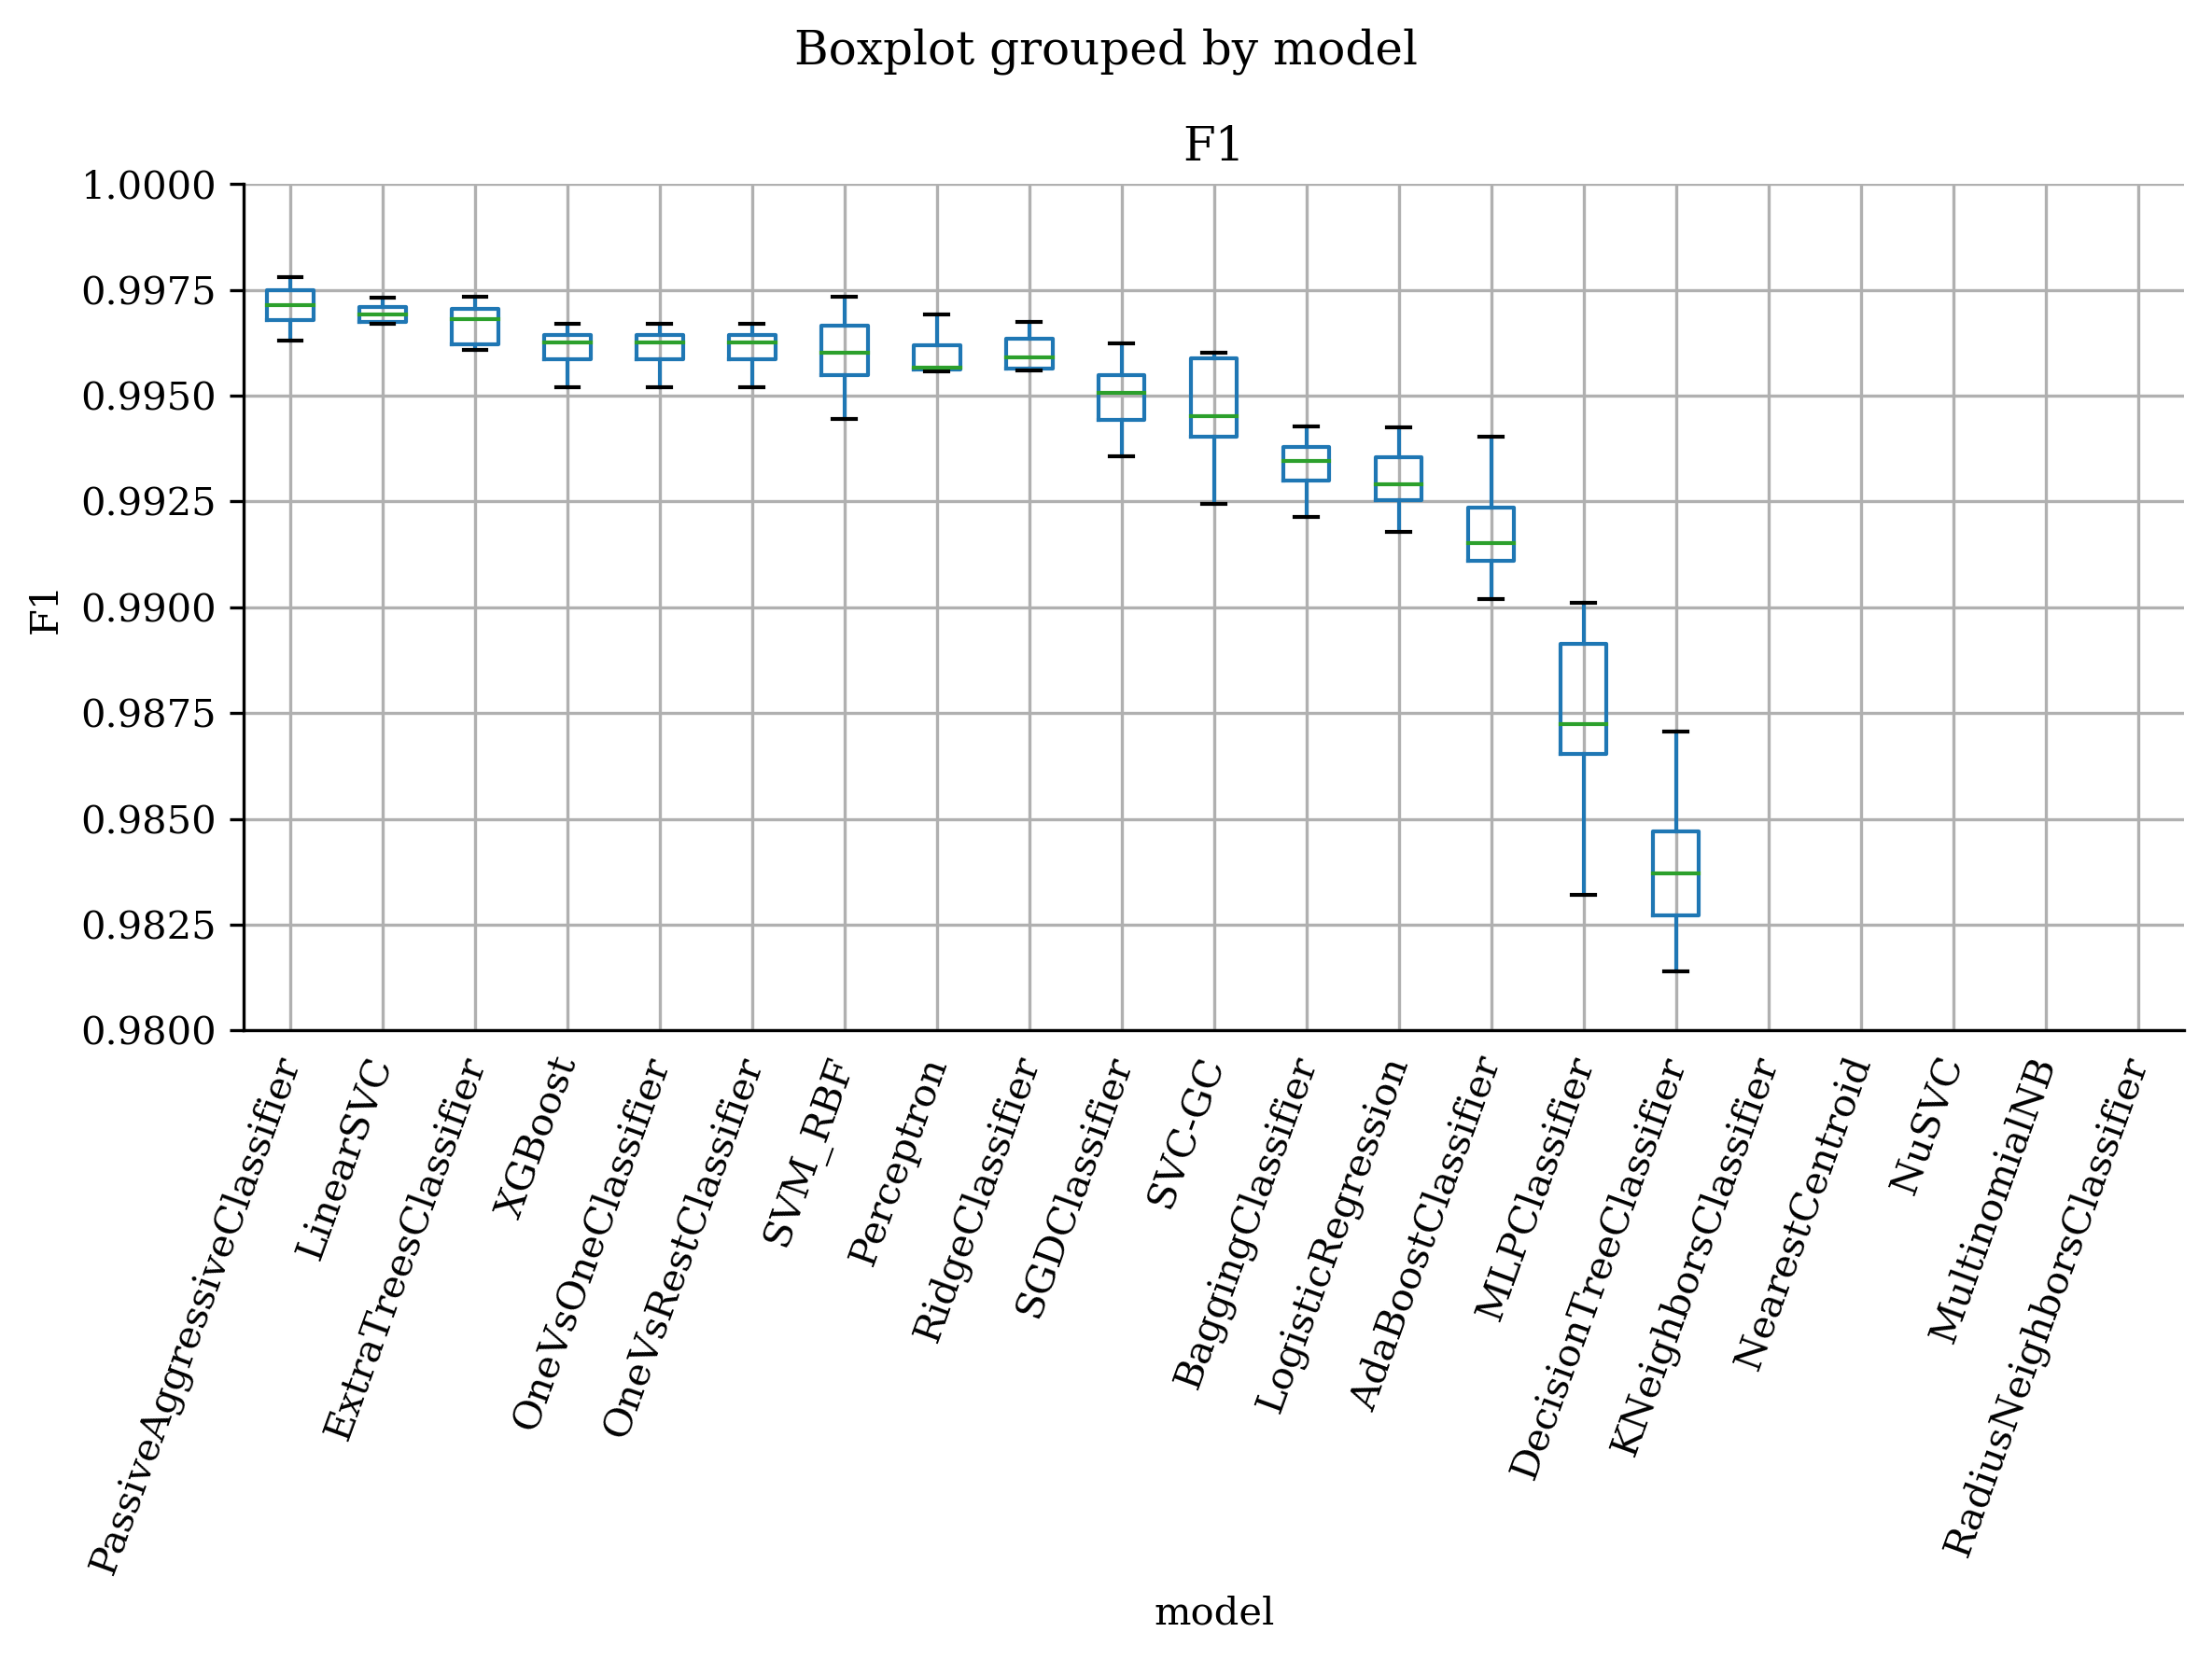

In [30]:
import matplotlib.patches as mpatches
df_small = df_all.sort_values(['f1_score'],ascending=[False])
df_small = rename_table_labels(df_small)

#order by mean F1
order_dict = {s: i for i, s in enumerate(df.sort_values(['f1_score'],ascending=[False]).loc[:,'model'])}

# Figure
current_figure_name = 'all_f1_sorted_f1_boxplot.png'
fig, ax = plt.subplots(figsize=(8, 6))
my_plot_errorbar(df_small,ax,'F1',order_dict=order_dict)
#plt.axhline(1, linestyle='--', linewidth=0.7, color=[0.9,0.9,0.9], zorder=0)
ax.set(ylim=(0.98, 1))
ax.set_ylabel('F1')
#ax.set_yscale('log')
#ax.legend(handles=[legend_cat_1],  loc='lower left')

fig.tight_layout()
if SAVE_OUTPUTS:
    ax.get_figure().savefig(figure_folder / current_figure_name)
###############################


print(plt.rcParams['font.family'])

### All Sorted (F1 and inference time)
Note: if you get warning:findfont: Font family 'Times New Roman' not found., install Times New Roman to ubuntu:  
```sudo apt install ttf-mscorefonts-installer```

['DejaVu Serif']


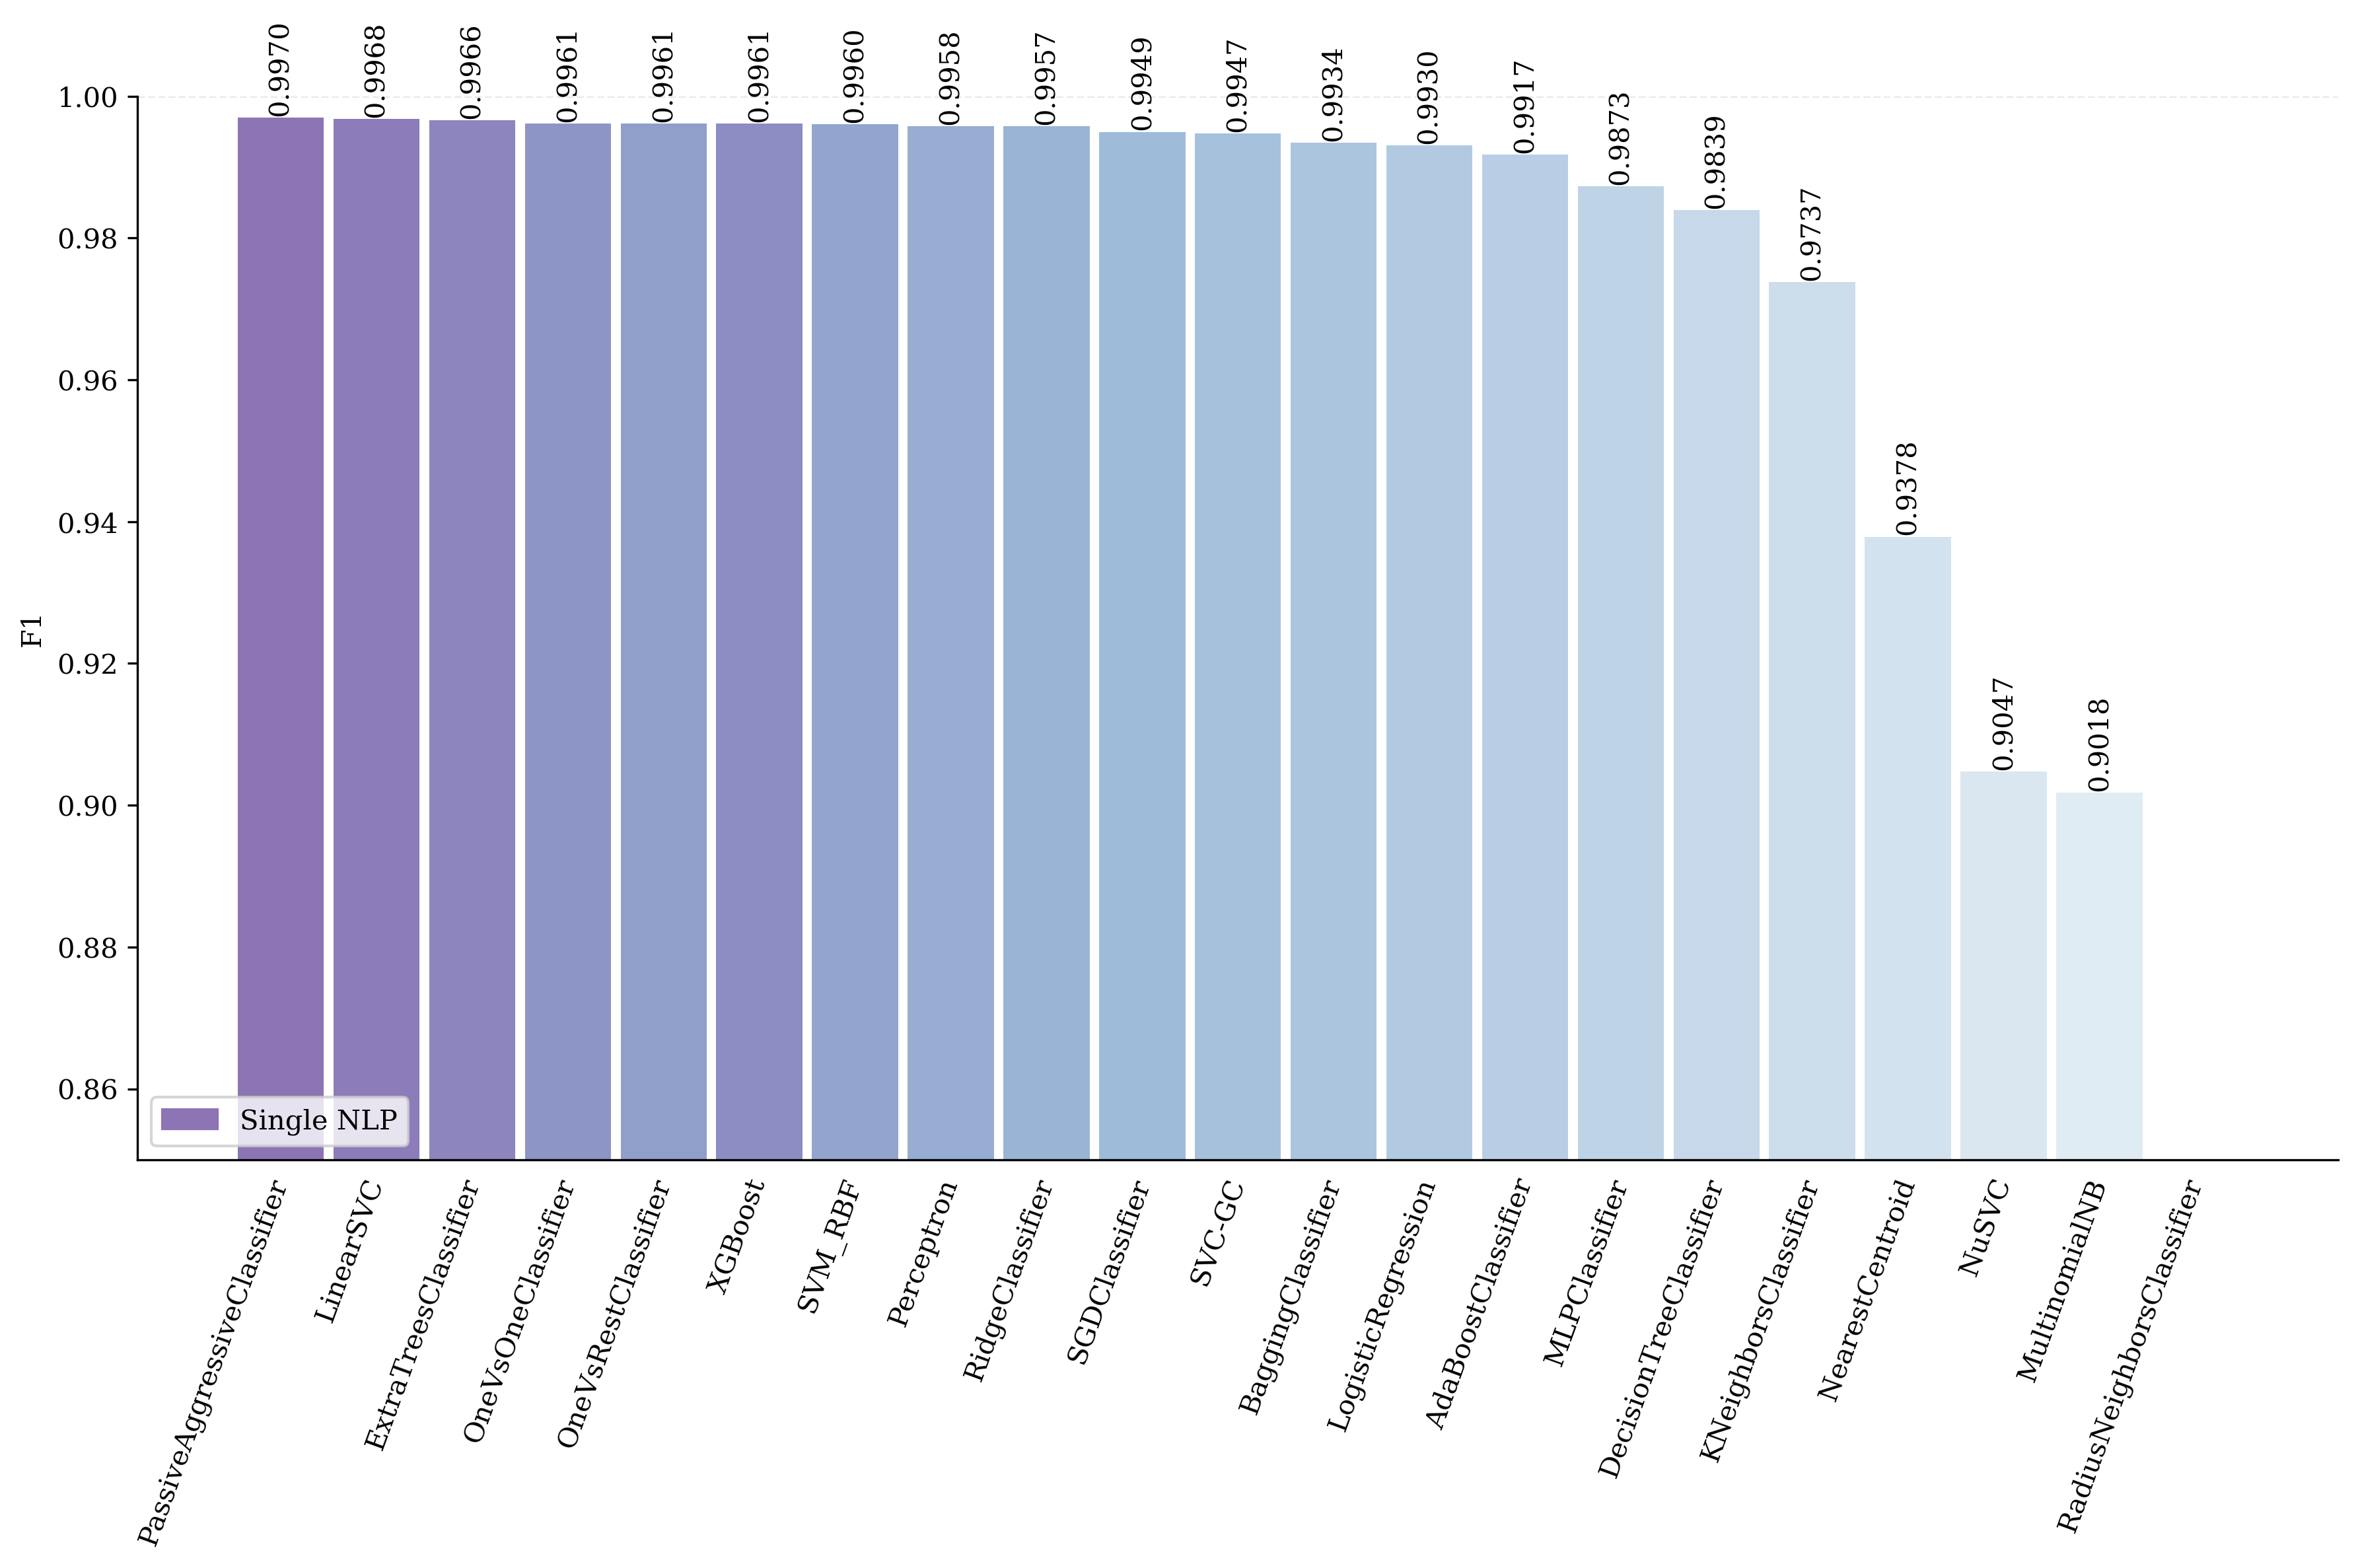

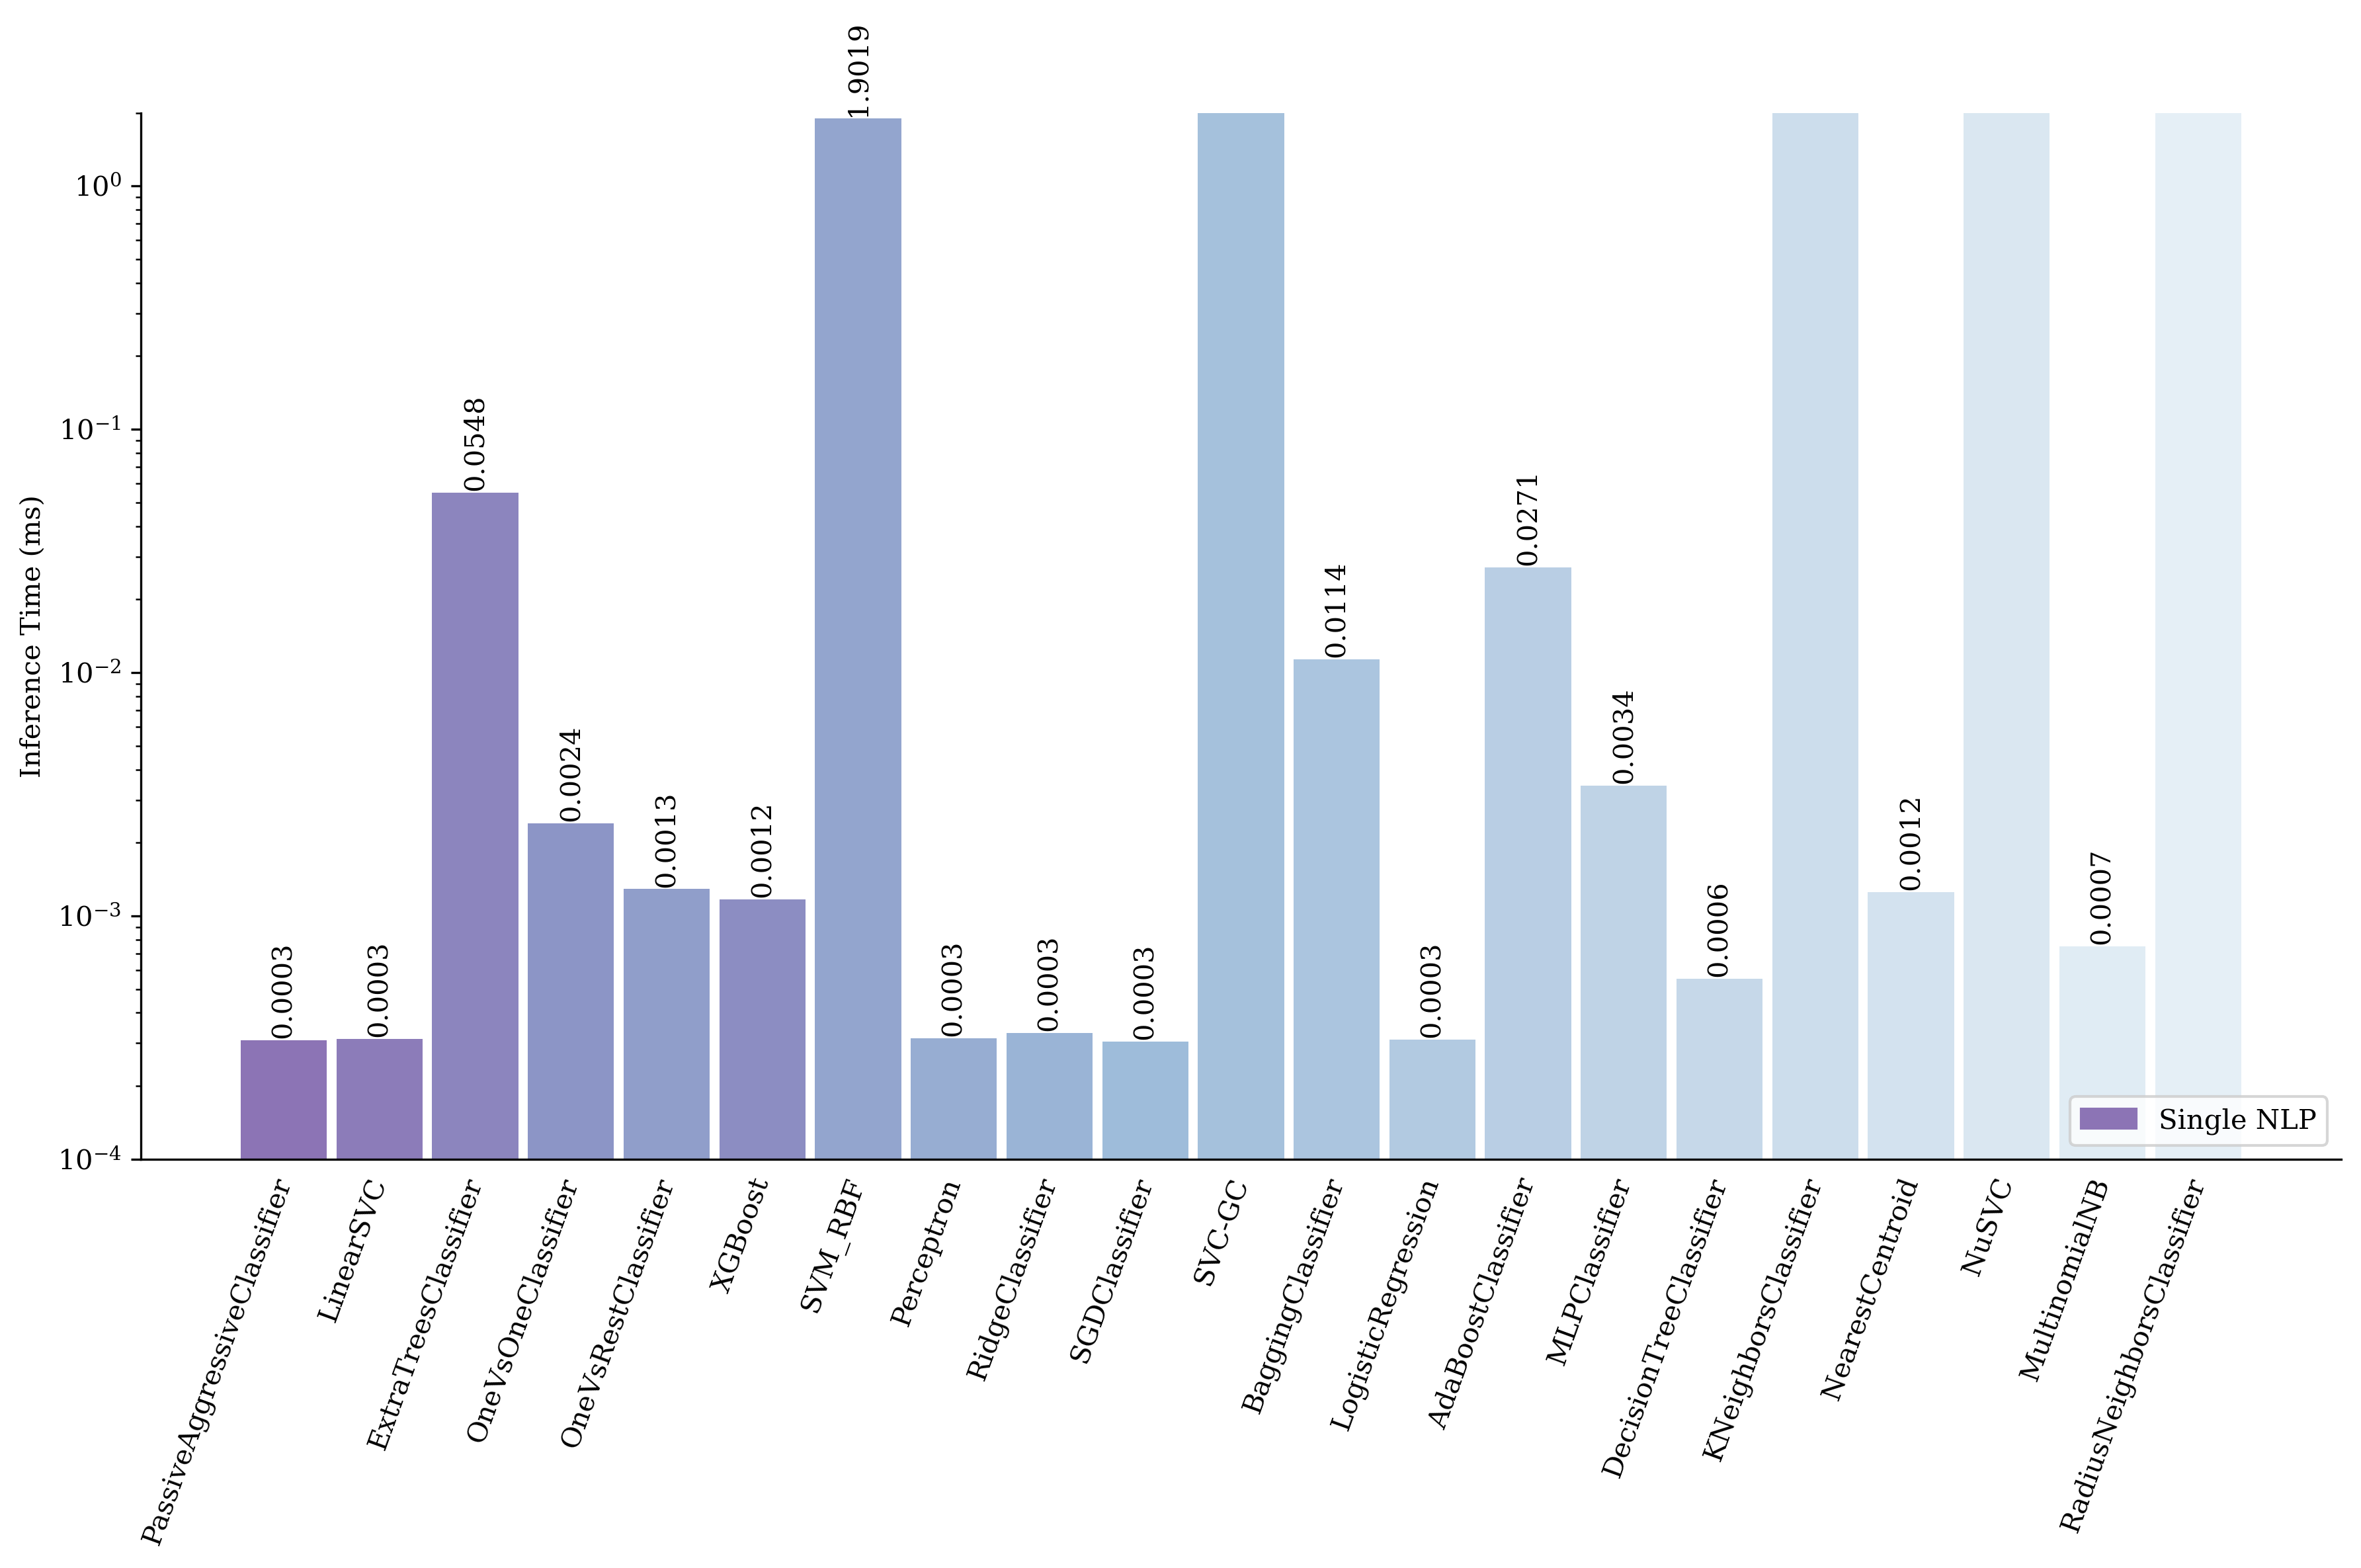

In [31]:
# method_category = 'transformer'
# metrics = ['overall_accuracy', 'precision', 'recall', 'f1', 'training time',
#        'testing time', 'color']
import matplotlib.patches as mpatches
df_small = df.sort_values(['category','f1_score'],ascending=[True, False])
df_small = rename_table_labels(df_small)
#df_small = df.loc[methods[method_category], metrics]
#df_small = df_small.sort_values(['category','f1'],ascending=[True, False])

# legend
color_cat_1 = np.asarray(df_small[df_small['category']=='classic_ml'] 
                         .head(1)['color'].values[0], dtype=np.float32) 
#color_cat_1 = tuple(matplotlib.colors.to_rgb(str(df_small[df_small['category']=='classic_ml'].head(1)['color'].values[0])))

legend_cat_1 = mpatches.Patch(color=color_cat_1, label='Single NLP')

# Figure
current_figure_name = 'all_f1_sorted_f1.png'
fig, ax = plt.subplots(figsize=(12, 8))
my_plot_bar(df_small,ax,'F1')
plt.axhline(1, linestyle='--', linewidth=0.7, color=[0.9,0.9,0.9], zorder=0)
ax.set(ylim=(0.85, 1))
ax.set_ylabel('F1')
ax.legend(handles=[legend_cat_1],  loc='lower left')

fig.tight_layout()
if SAVE_OUTPUTS:
    ax.get_figure().savefig(figure_folder / current_figure_name)
###############################
current_figure_name = 'all_f1_sorted_inference_time.png'
fig, ax = plt.subplots(figsize=(12, 8))
my_plot_bar(df_small,ax,'Inference Time (ms)')
ax.set(ylim=(0.0001, 2))
ax.set_yscale('log')
ax.set_ylabel('Inference Time (ms)')
ax.legend(handles=[legend_cat_1],  loc='lower right')
fig.tight_layout()
if SAVE_OUTPUTS:
    ax.get_figure().savefig(figure_folder / current_figure_name)

print(plt.rcParams['font.family'])

In [32]:
def process_style_to_my_latex_format(df_latex):
  # returns style object
  
  s = df_latex.style
  s = s.format(precision=4, escape="latex")
  return s

### Single NLP (F1 vs Inference)

In [33]:
df_small

model  Accuracy  Precision    Recall        F1  \
13  PassiveAggressiveClassifier  0.997746   0.999029  0.994904  0.996962   
5                     LinearSVC  0.997615   0.999558  0.994026  0.996784   
3          ExtraTreesClassifier  0.997452   0.999644  0.993496  0.996560   
11           OneVsOneClassifier  0.997125   0.999159  0.993105  0.996121   
12          OneVsRestClassifier  0.997125   0.999159  0.993105  0.996121   
20                      XGBoost  0.997125   0.999159  0.993105  0.996121   
19                      SVM_RBF  0.997060   0.999424  0.992662  0.996031   
14                   Perceptron  0.996847   0.996391  0.995122  0.995755   
16              RidgeClassifier  0.996831   0.999468  0.992003  0.995721   
17                SGDClassifier  0.996259   0.999423  0.990511  0.994946   
18                       SVC-GC  0.996080   0.999378  0.990070  0.994702   
1             BaggingClassifier  0.995132   0.997213  0.989667  0.993422   
6            LogisticRegression  0.994855   0.998796  0.987345  0.993037   
0            AdaBoostClassifier  0.993891   0.996450  0.987083  0.991743   
7                 MLPClassifier  0.990640   0.998290  0.976499  0.987269   
2        DecisionTreeClassifier  0.988206   0.995638  0.972511  0.983932   
4          KNeighborsClassifier  0.980644   0.981638  0.965976  0.973739   
9               NearestCentroid  0.956093   0.989034  0.891704  0.937836   
10                        NuSVC  0.935348   0.999682  0.826279  0.904730   
8                 MultinomialNB  0.920222   0.831090  0.985641  0.901780   
15    RadiusNeighborsClassifier  0.825172   0.688492  0.967084  0.804336   

        TP      TN     FP     FN feature_method  ...  Test Size  \
13  2263.1  3845.1    2.2   11.6   tf-idf_ngram  ...     6122.0   
5   2261.1  3846.3    1.0   13.6   tf-idf_ngram  ...     6122.0   
3   2259.9  3846.5    0.8   14.8   tf-idf_ngram  ...     6122.0   
11  2259.0  3845.4    1.9   15.7   tf-idf_ngram  ...     6122.0   
12  2259.0  3845.4    1.9   15.7   tf-idf_ngram  ...     6122.0   
20  2259.0  3845.4    1.9   15.7   tf-idf_ngram  ...     6122.0   
19  2258.0  3846.0    1.3   16.7   tf-idf_ngram  ...     6122.0   
14  2263.6  3839.1    8.2   11.1   tf-idf_ngram  ...     6122.0   
16  2256.5  3846.1    1.2   18.2   tf-idf_ngram  ...     6122.0   
17  2253.1  3846.0    1.3   21.6   tf-idf_ngram  ...     6122.0   
18  2252.1  3845.9    1.4   22.6   tf-idf_ngram  ...     6122.0   
1   2251.2  3841.0    6.3   23.5   tf-idf_ngram  ...     6122.0   
6   2245.9  3844.6    2.7   28.8   tf-idf_ngram  ...     6122.0   
0   2245.3  3839.3    8.0   29.4   tf-idf_ngram  ...     6122.0   
7   2221.2  3843.5    3.8   53.5   tf-idf_ngram  ...     6122.0   
2   2212.2  3837.6    9.7   62.5   tf-idf_ngram  ...     6122.0   
4   2197.3  3806.2   41.1   77.4   tf-idf_ngram  ...     6122.0   
9   2028.4  3824.8   22.5  246.3   tf-idf_ngram  ...     6122.0   
10  1879.5  3846.7    0.6  395.2   tf-idf_ngram  ...     6122.0   
8   2242.0  3391.6  455.7   32.7   tf-idf_ngram  ...     6122.0   
15  2199.8  2851.9  995.4   74.9   tf-idf_ngram  ...     6122.0   

    extraction_time  feature_size  Training Time (ms)  threshold  \
13         3.410406       28816.5            0.007081        0.5   
5          3.410406       28816.5            0.008926        0.5   
3          3.410406       28816.5            0.770228        0.5   
11         3.410406       28816.5            0.133423        0.5   
12         3.410406       28816.5            0.132638        0.5   
20         3.410406       28816.5            0.132150        0.5   
19         3.410406       28816.5            6.637911        0.5   
14         3.410406       28816.5            0.004783        0.5   
16         3.410406       28816.5            0.027836        0.5   
17         3.410406       28816.5            0.005706        0.5   
18         3.410406       28816.5           14.800860        0.5   
1          3.410406       28816.5            2.915317        0

In [34]:
# Table: Single NLP
table_name = "single"
caption="Accuracy and inference speed of single NLP methods."
out_file_name = (table_folder / table_name).with_suffix('.tex') 
method_cat = 'classic_ml'
metrics = ['accuracy', 'precision', 'recall', 'f1_score', 'train_time',
       'pred_time', 'color', 'category', 'Method']

df_small = df.loc[df['category']==method_cat,metrics]

df_small = rename_table_labels(df_small)
df_small.set_index('Method', inplace=True)
#print(df_small)

s = process_style_to_my_latex_format(df_small.drop(['color', 'category'], axis=1 ))

s = s.highlight_max(props='textbf:--rwrap;', subset=s.columns[1:-2])
s = s.highlight_min(props='textbf:--rwrap;', subset=s.columns[-2:])

if SAVE_OUTPUTS:
    s.to_latex(buf=out_file_name,
       column_format="lrrrrrr", position="htbp", position_float="centering",
       hrules=True, label=f"tab:{table_name}", caption=caption)

print(s.to_latex(
    column_format="lrrrrrr", position="ht", position_float="centering",
    hrules=True, label=f"table:{table_name}", caption=caption)
)
#df.loc[:,"training time"] / df.loc[:,"train size"]
#(df.loc[:,["training time", "testing time"]]*1000).div(df.loc[:,["train size", "test size"]])

\begin{table}[ht]
\centering
\caption{Accuracy and inference speed of single NLP methods.}
\label{table:single}
\begin{tabular}{lrrrrrr}
\toprule
{} & {Accuracy} & {Precision} & {Recall} & {F1} & {Training Time (ms)} & {Inference Time (ms)} \\
{Method} & {} & {} & {} & {} & {} & {} \\
\midrule
AdaBoostClassifier & 0.9939 & 0.9965 & 0.9871 & 0.9917 & 0.9266 & 0.0271 \\
BaggingClassifier & 0.9951 & 0.9972 & 0.9897 & 0.9934 & 2.9153 & 0.0114 \\
DecisionTreeClassifier & 0.9882 & 0.9956 & 0.9725 & 0.9839 & 0.0750 & 0.0006 \\
ExtraTreesClassifier & 0.9975 & 0.9996 & 0.9935 & 0.9966 & 0.7702 & 0.0548 \\
KNeighborsClassifier & 0.9806 & 0.9816 & 0.9660 & 0.9737 & 0.0003 & 30.8639 \\
LinearSVC & 0.9976 & 0.9996 & 0.9940 & 0.9968 & 0.0089 & 0.0003 \\
LogisticRegression & 0.9949 & 0.9988 & 0.9873 & 0.9930 & 0.0300 & 0.0003 \\
MLPClassifier & 0.9906 & 0.9983 & 0.9765 & 0.9873 & 2.2547 & 0.0034 \\
MultinomialNB & 0.9202 & 0.8311 & 0.9856 & 0.9018 & 0.0008 & 0.0007 \\
NearestCentroid & 0.9561 & 0.989

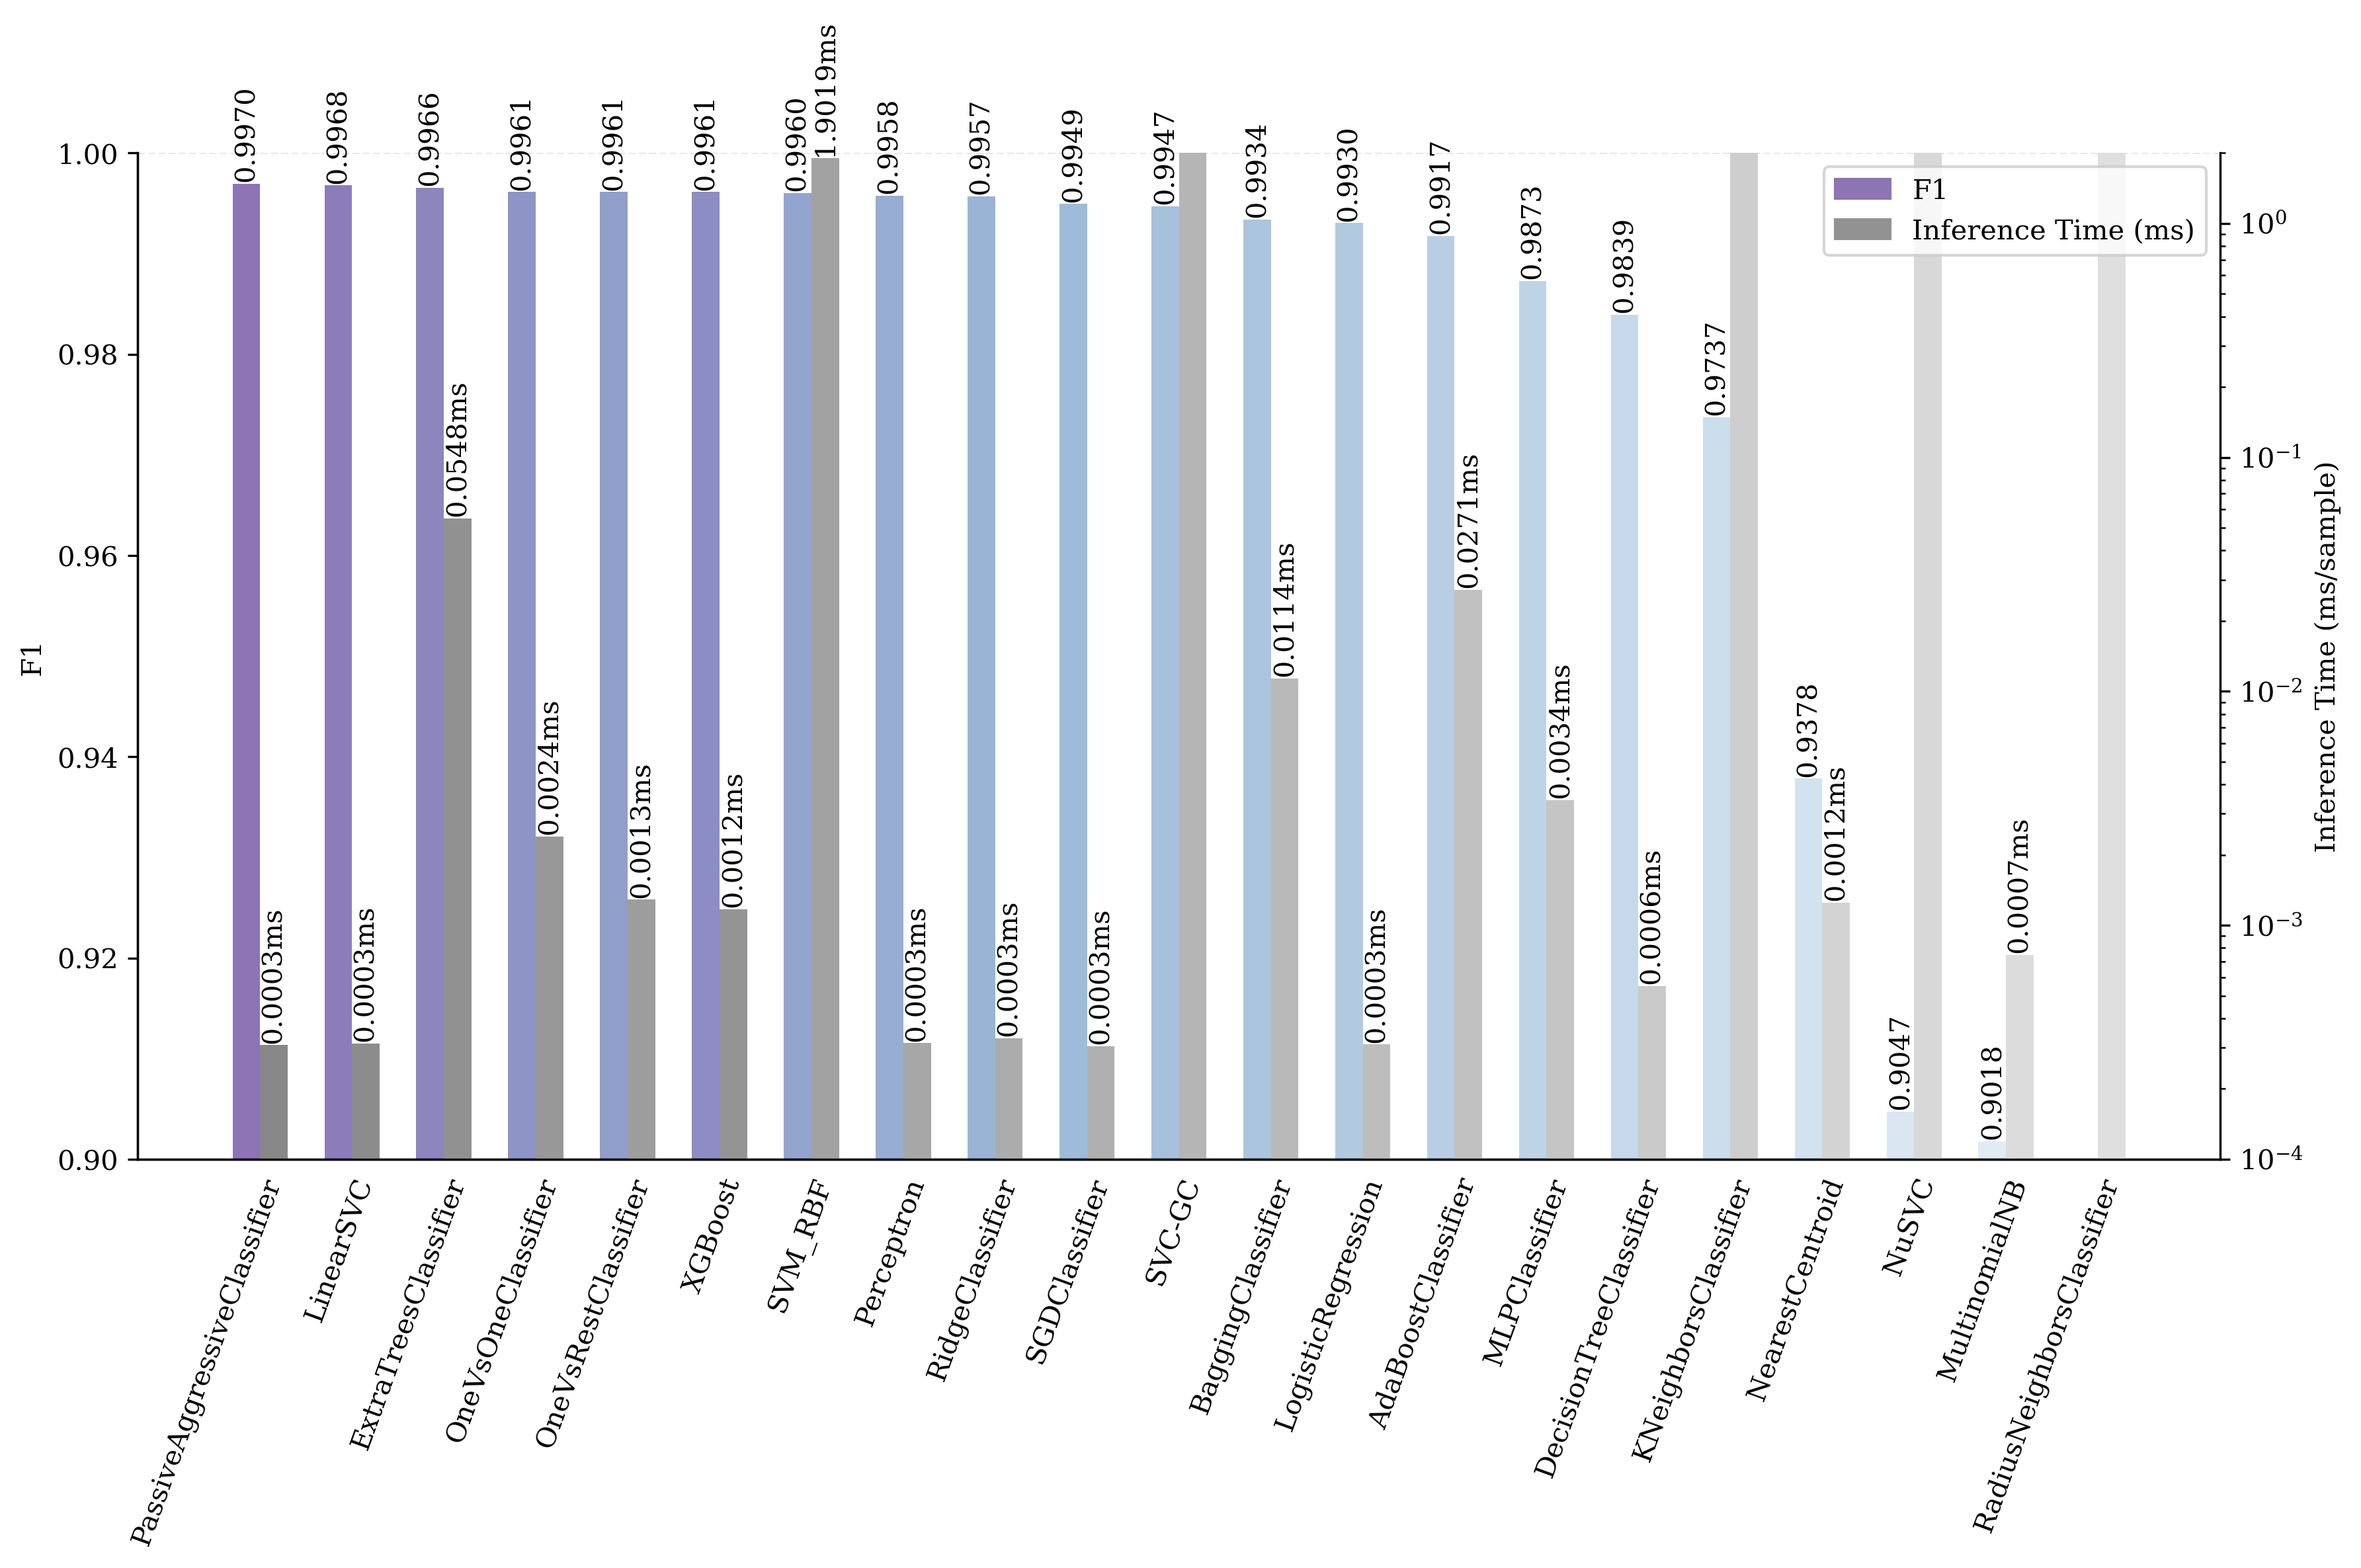

In [35]:
# Figure of Table Single NLP
current_figure_name = 'single_nlp_f1_vs_time.png'
fig, ax = plt.subplots( figsize=(12,8))

metric = ['F1', 'Inference Time (ms)']
df_small = df_small.sort_values(metric,ascending=False)

# legend
color_cat_1 = np.asarray(df_small[df_small['category']=='classic_ml'] 
                         .head(1)['color'].values[0], dtype=np.float32)
color_cat_1G = color_cat_1.copy()
color_cat_1G[0:3] = color_cat_1G[0:3].mean()

legend_cat_1 = mpatches.Patch(color=color_cat_1, label=metric[0])
legend_cat_1G = mpatches.Patch(color=color_cat_1G, label=metric[1])


df_small.reset_index(inplace=True)
_, ax2 = my_plot_twin_bar(df_small,ax,metric)
ax.axhline(1,  linestyle='--', linewidth=0.7, color=[0.9,0.9,0.9], zorder=0)
ax.set(ylim=(0.90, 1))
ax.set_ylabel('F1')

ax2.set_ylabel('Inference Time (ms/sample)')
ax2.set(ylim=(0.0001, 2))
ax2.set_yscale('log')
ax2.legend(handles=[legend_cat_1, legend_cat_1G],  loc='upper right')

fig.tight_layout()
if SAVE_OUTPUTS:
    ax2.get_figure().savefig(figure_folder / current_figure_name)


### All methods FE score vs alpha

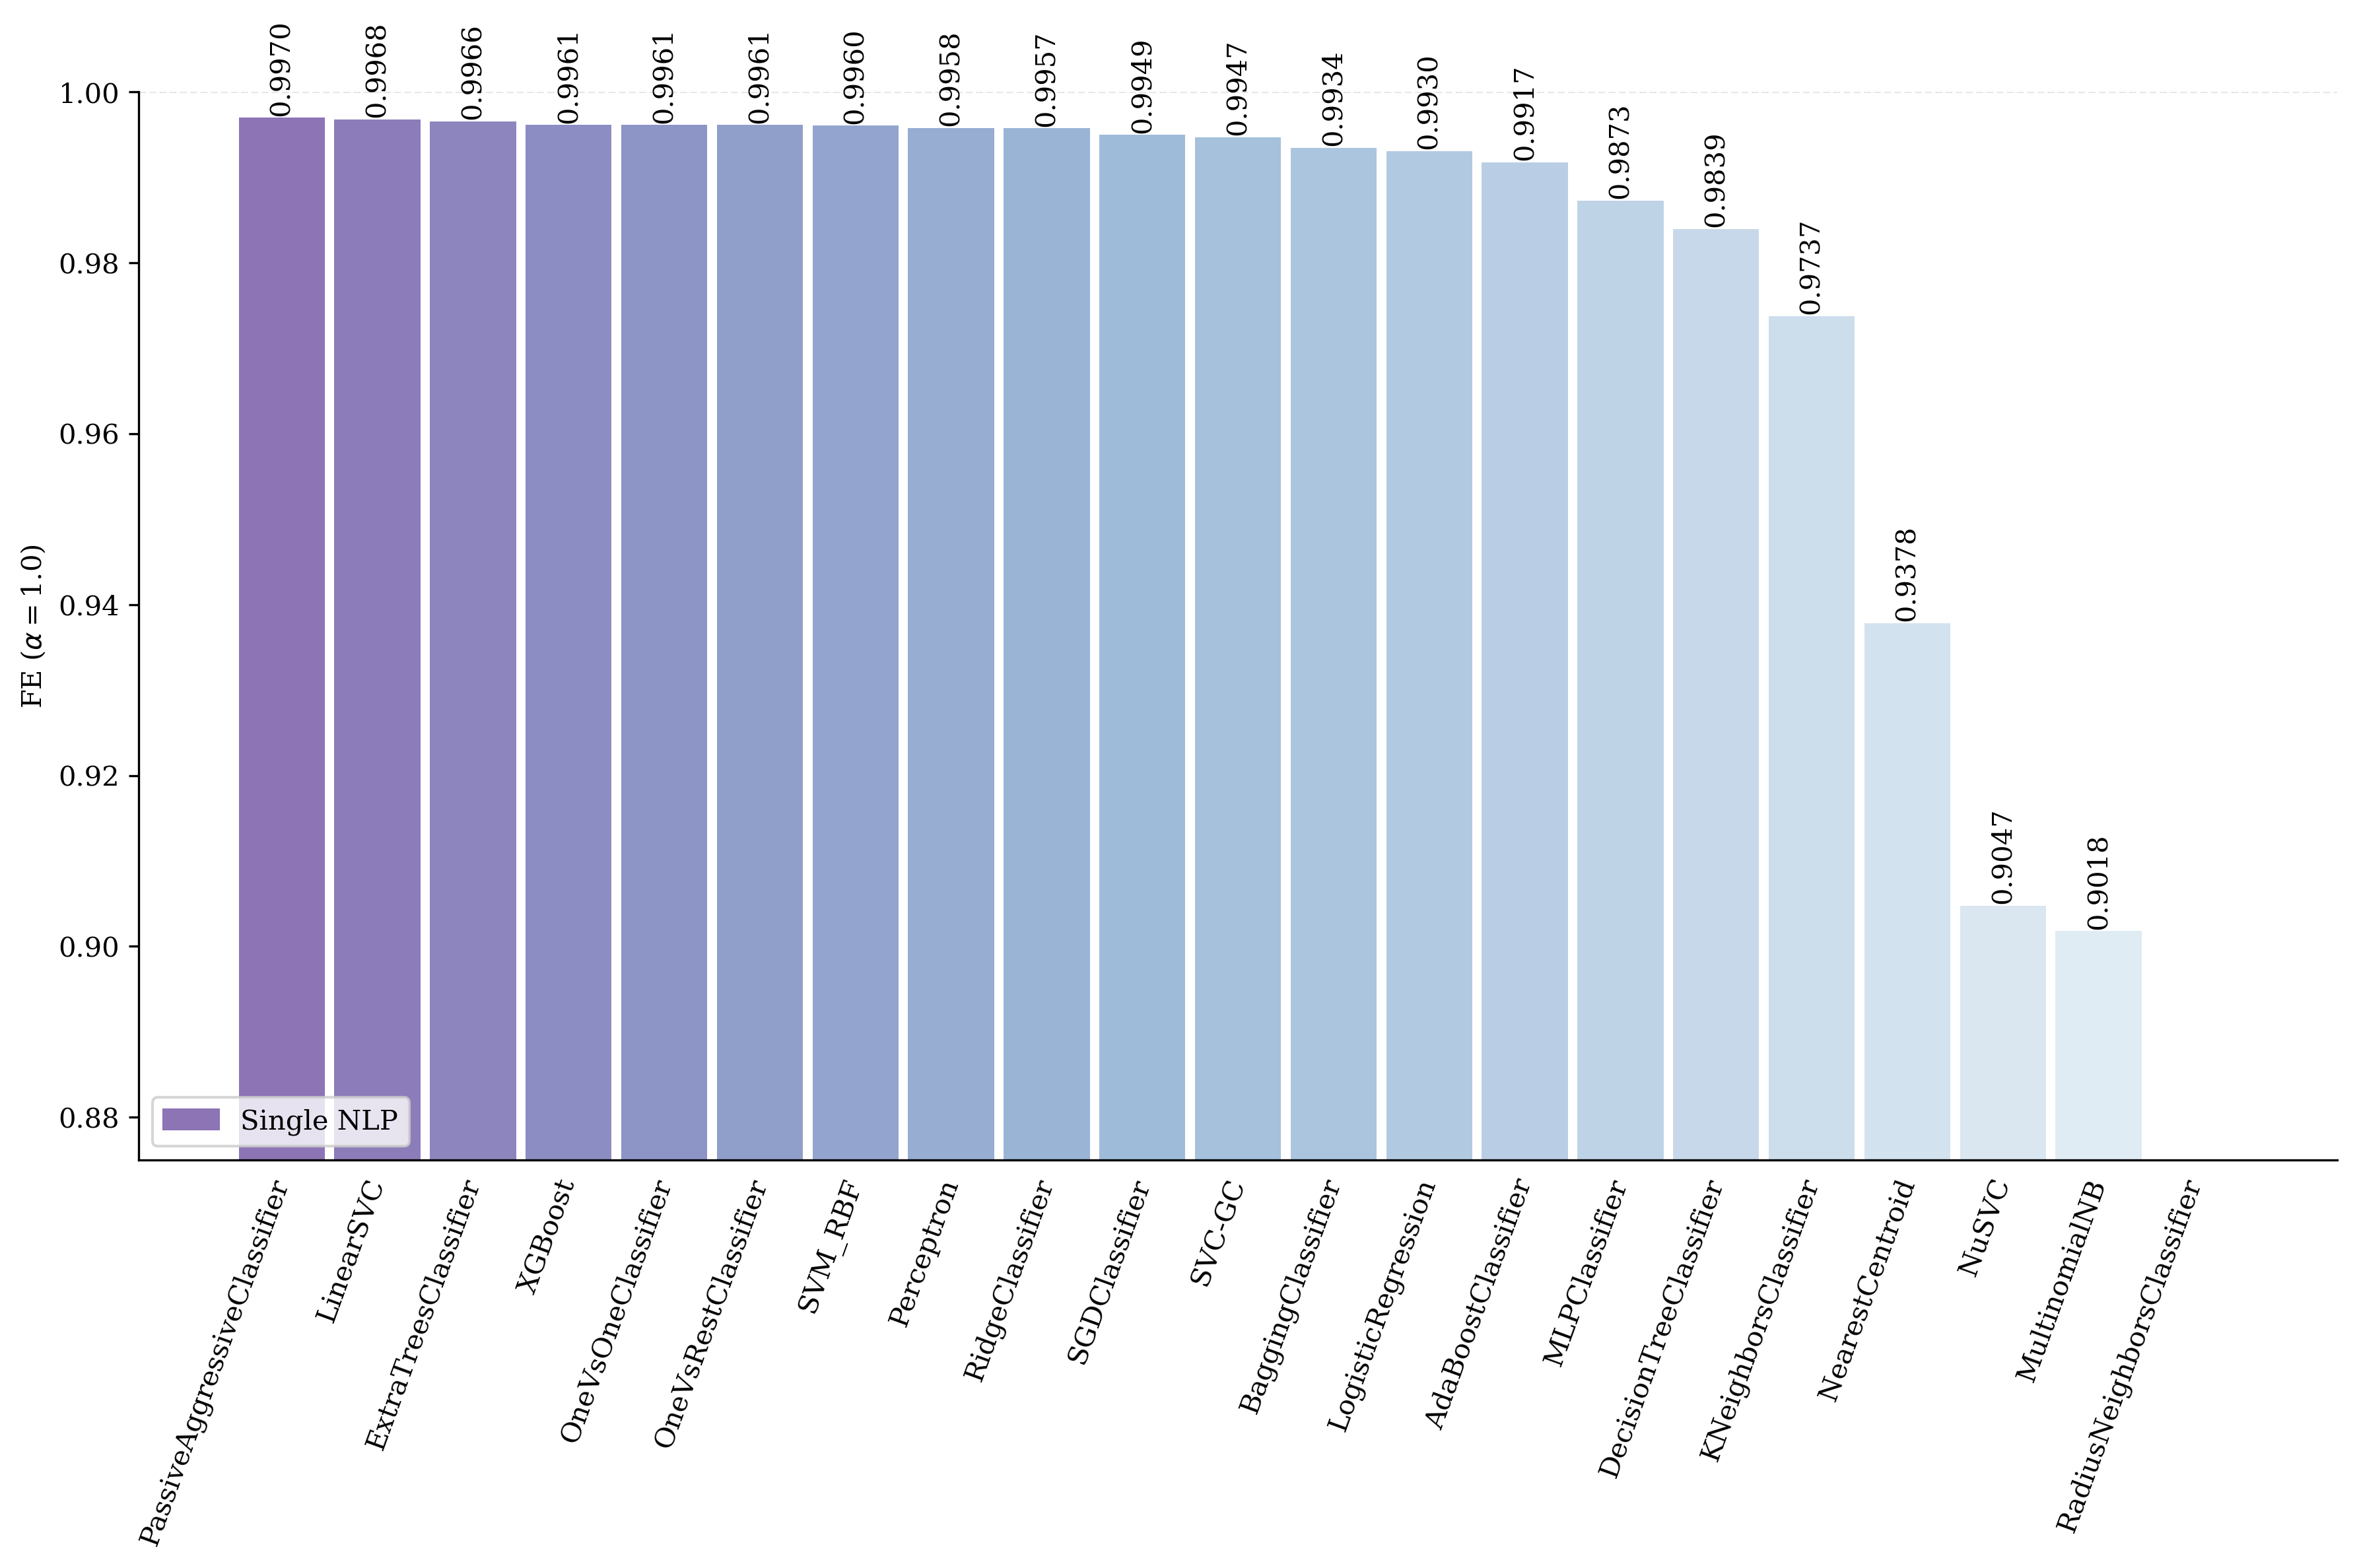

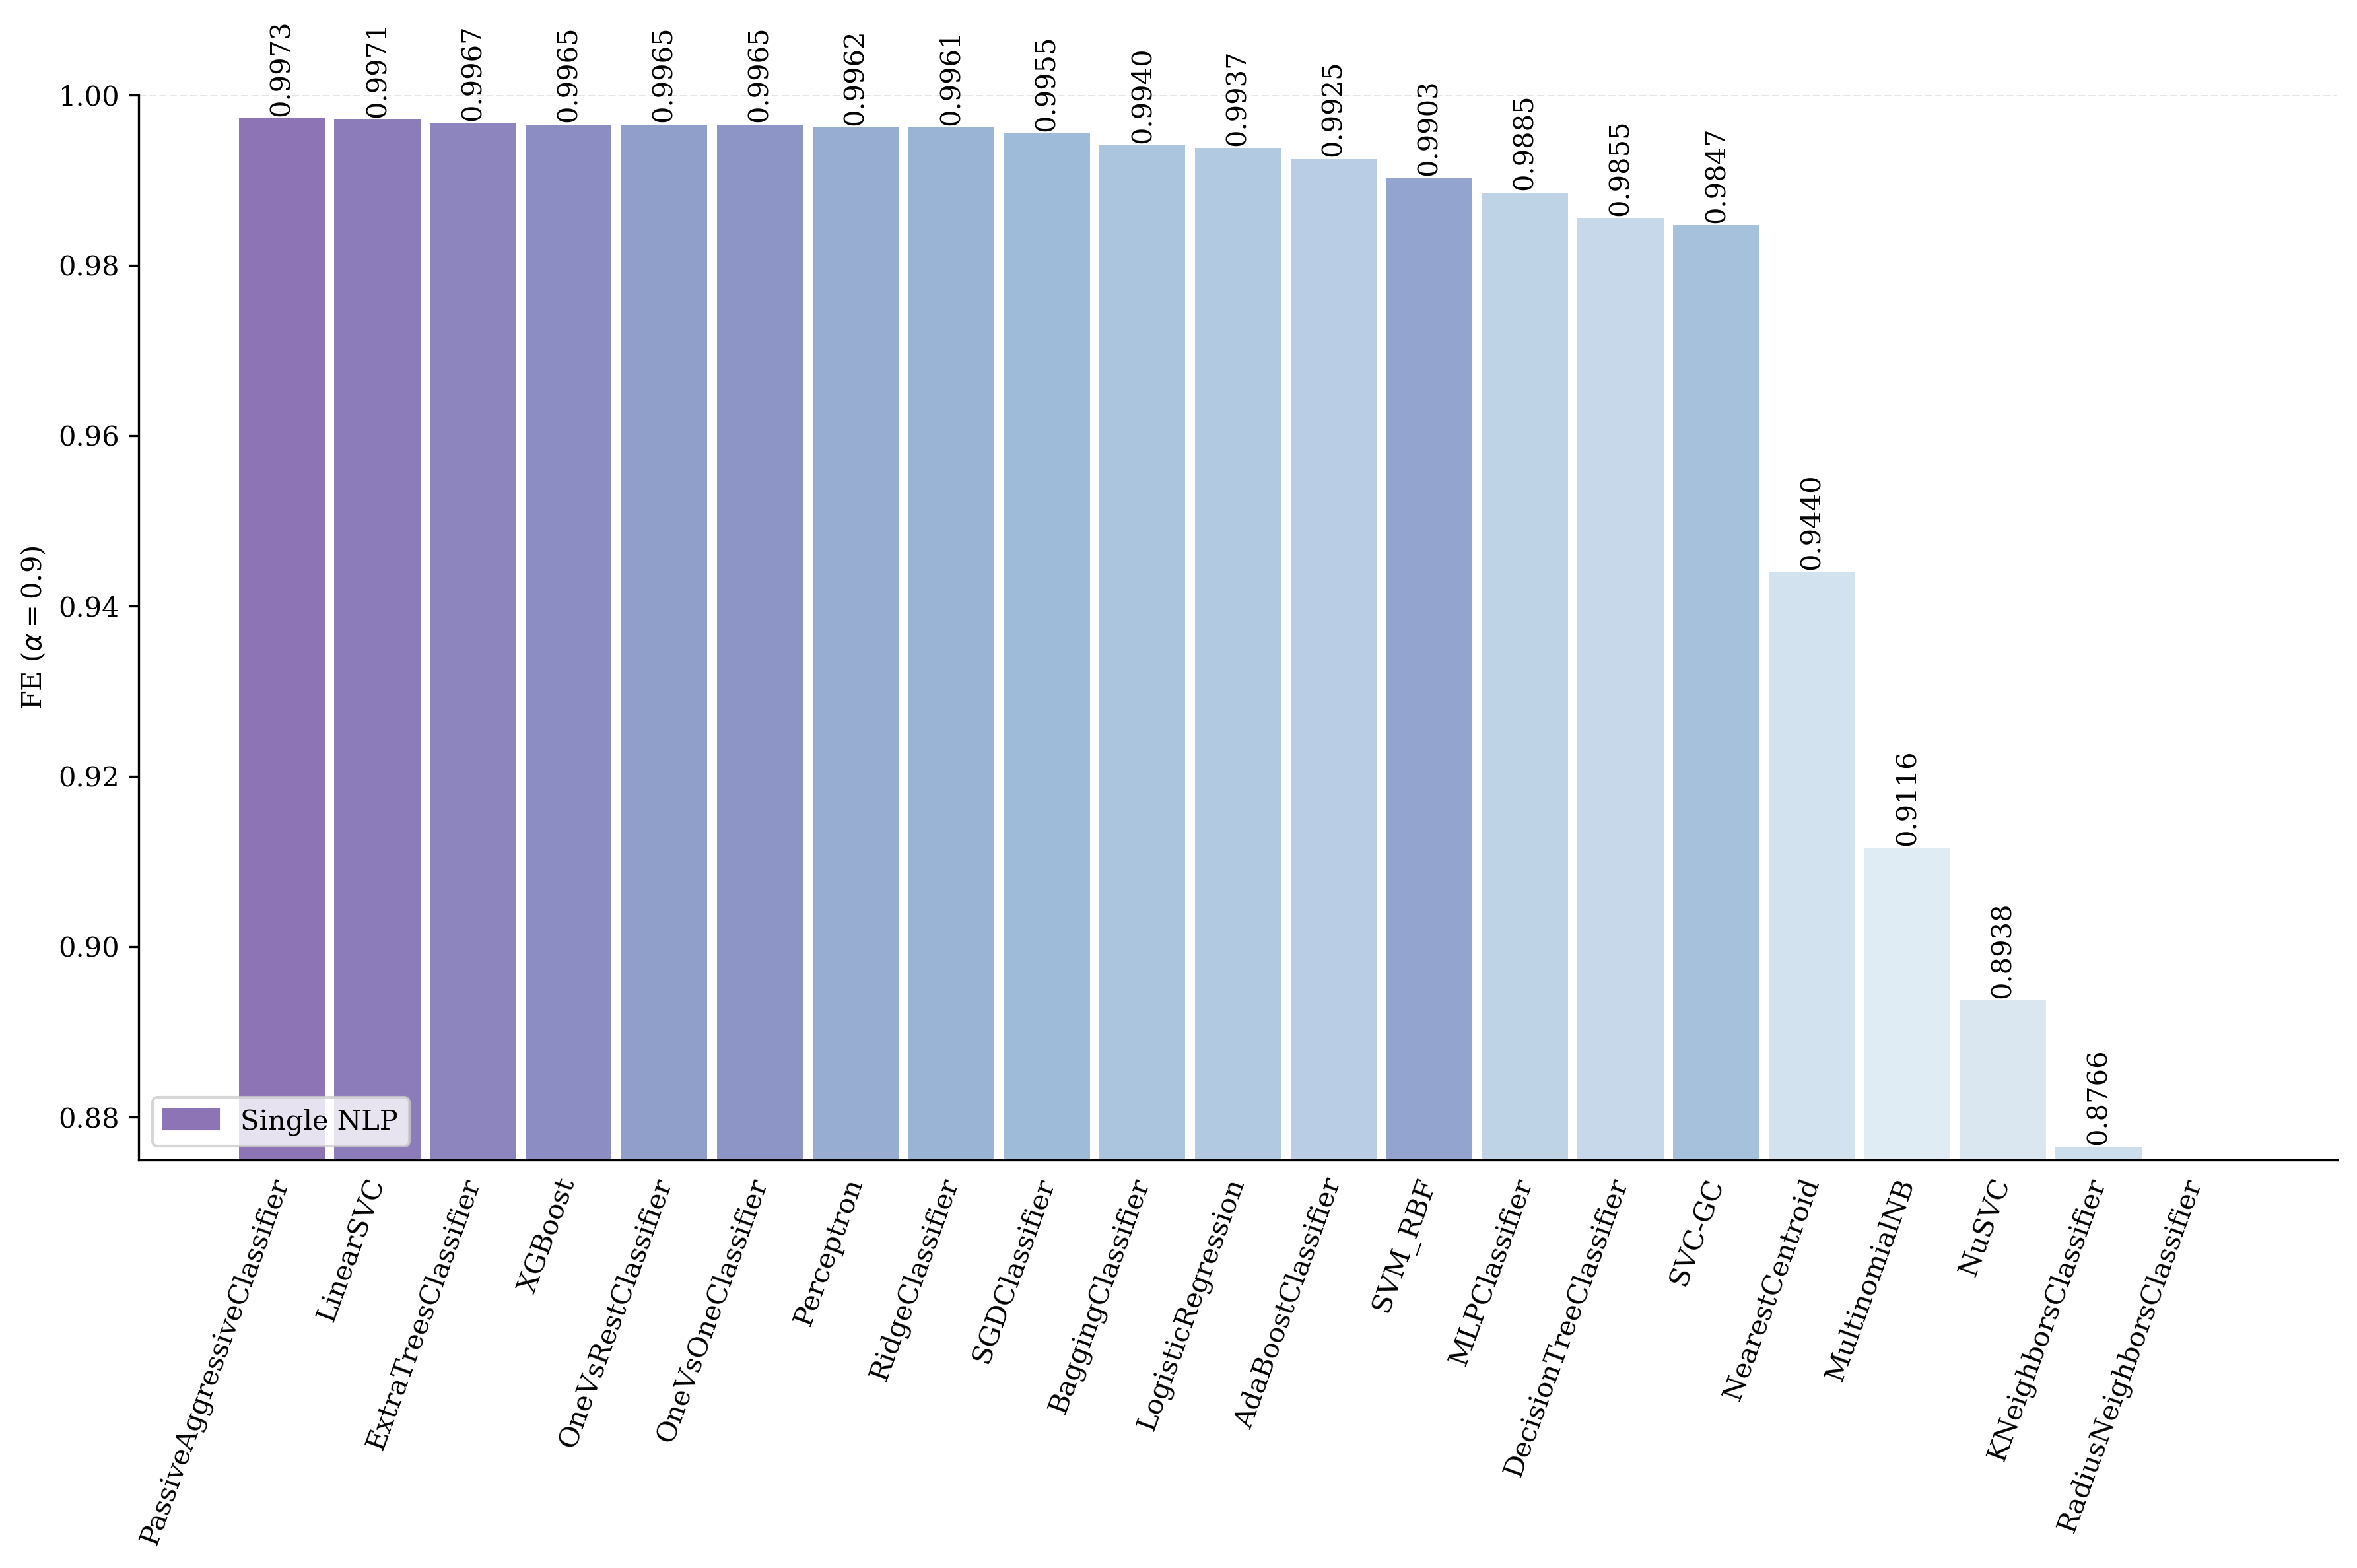

In [36]:
#ALL FE comparison for different alpha
from sklearn import preprocessing

current_figure_name = 'all_nlp_FE_alpha_100.png'

#df_small = df.sort_values(['category','f1'],ascending=[True, False])
df_small = df.sort_values('f1_score',ascending=False)

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(1.0000 - df_small['pred_time'].to_numpy().reshape(-1, 1))
df_small['inference scaled'] = x_scaled

alpha = 1.0
#alpha=1.00 #emphasis on F1 rather than speed
df_small['FE_100'] = alpha*df_small['f1_score'] + (1-alpha)*df_small['inference scaled']
#print(df_small)
alpha = 0.90
df_small['FE_090'] = alpha*df_small['f1_score'] + (1-alpha)*df_small['inference scaled']

df_small = rename_table_labels(df_small)



# legend
color_cat_1 = np.asarray(df_small[df_small['category']=='classic_ml'] 
                         .head(1)['color'].values[0], dtype=np.float32) 
legend_cat_1 = mpatches.Patch(color=color_cat_1, label='Single NLP')

# Figure
fig, ax = plt.subplots(figsize=(12, 8))
df_small = df_small.sort_values('FE_100',ascending=False)

my_plot_bar(df_small,ax,'FE_100')
plt.axhline(1, linestyle='--', linewidth=0.7, color=[0.9,0.9,0.9], zorder=0)

ax.set_ylabel('FE'+ r' ($\alpha=$' + f'{1.0})')
#ax.set_xlabel(r'$\alpha=$' + f'{alpha}')
ax.set(ylim=(0.875, 1))
ax.legend(handles=[legend_cat_1],  loc='lower left')

fig.tight_layout()
if SAVE_OUTPUTS:
    ax.get_figure().savefig(figure_folder / current_figure_name)

#########################
current_figure_name = 'all_nlp_FE_alpha_090.png'
fig, ax = plt.subplots(figsize=(12, 8))
df_small = df_small.sort_values('FE_090',ascending=False)
my_plot_bar(df_small,ax,'FE_090')
plt.axhline(1, linestyle='--', linewidth=0.7, color=[0.9,0.9,0.9], zorder=0)
ax.set_ylabel('FE'+ r' ($\alpha=$' + f'{0.90})')
#ax.set_xlabel()
ax.set(ylim=(0.875, 1))
ax.legend(handles=[legend_cat_1],  loc='lower left')

fig.tight_layout()
if SAVE_OUTPUTS:
    ax.get_figure().savefig(figure_folder / current_figure_name)

### Scatter plot

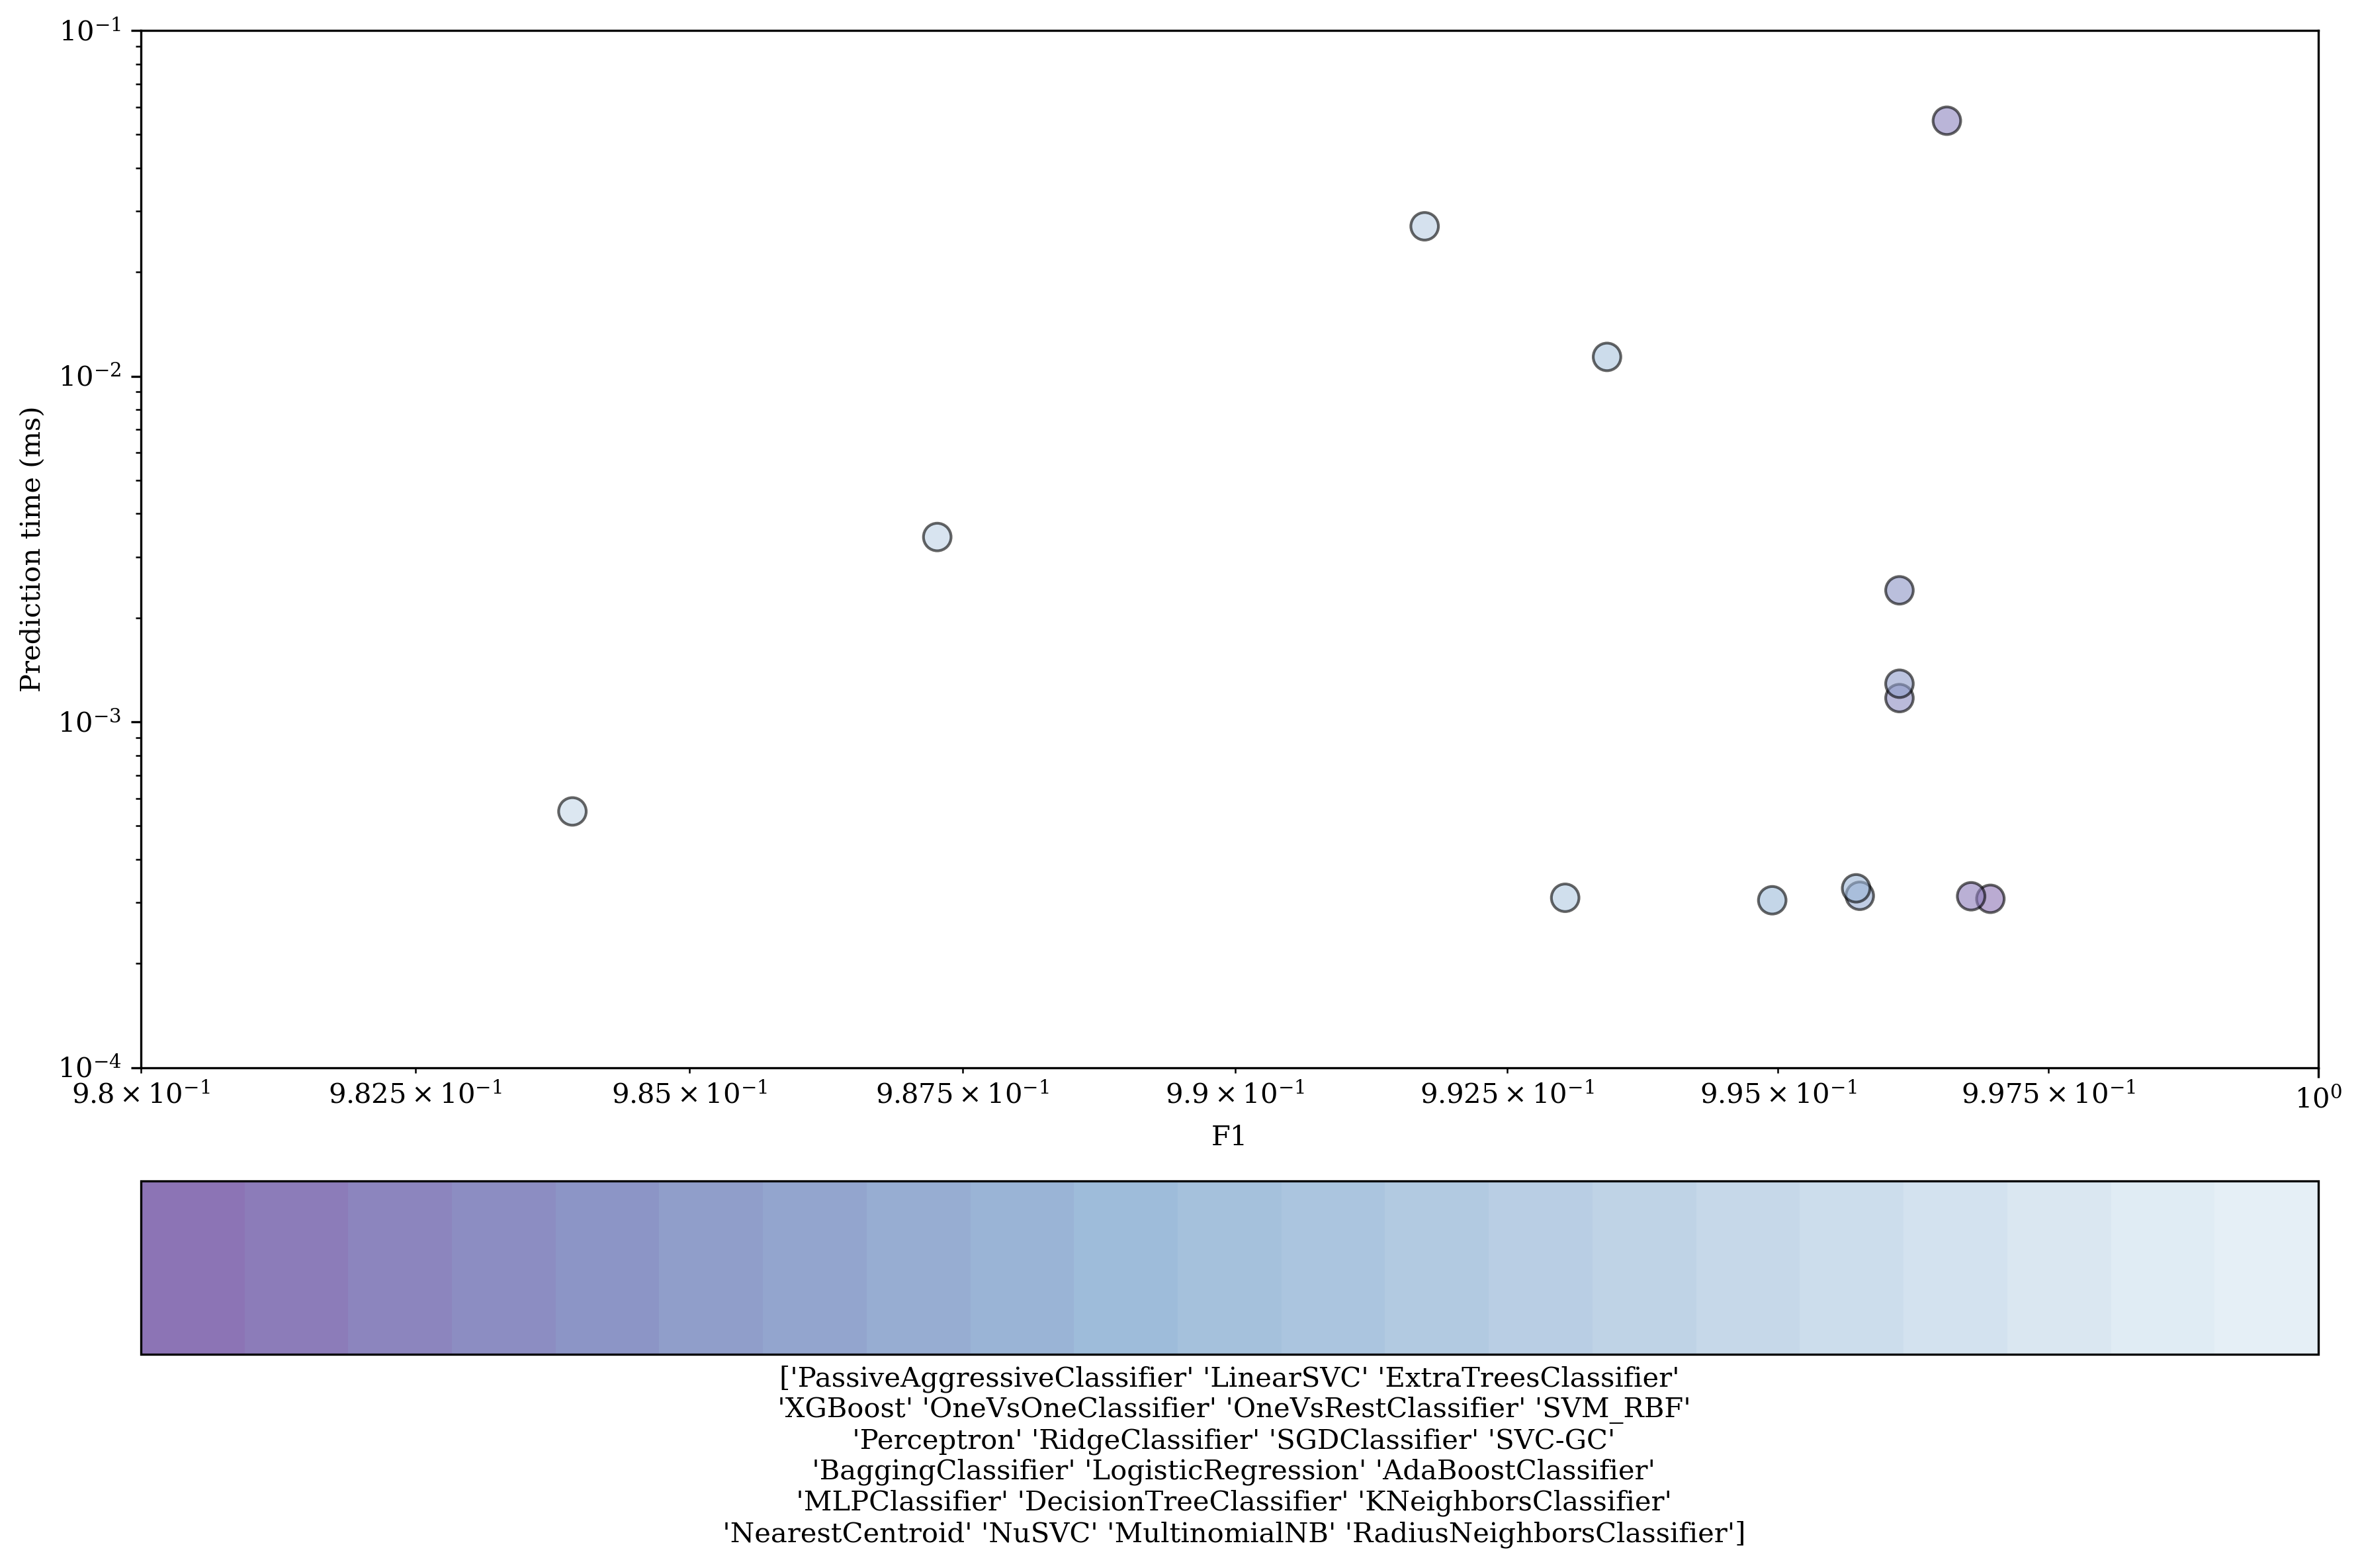

In [37]:
#Scatter plot speed vs F1
from sklearn import preprocessing

current_figure_name = 'speed_vs_f1_scatter.png'

#df_small = df.sort_values(['category','f1'],ascending=[True, False])
df_small = df.sort_values('f1_score',ascending=False)

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(1.0000 - df_small['pred_time'].to_numpy().reshape(-1, 1))
df_small['inference scaled'] = x_scaled
f1 = df_small['f1_score']
t_pred = df_small['pred_time']

#colors = df_small.loc[:,'color'].values
#colors = [list(colors[i][0]) for i in range(len(colors))]

colors = df_small.loc[:, 'color'].values.tolist()
colors = [list(color) if isinstance(color, np.ndarray) else [color] for color in colors]


df_small = rename_table_labels(df_small)

# legend
color_cat_1 = np.asarray(df_small[df_small['category']=='classic_ml'] 
                         .head(1)['color'].values[0], dtype=np.float32) 

legend_cat_1 = mpatches.Patch(color=color_cat_1, label='Single NLP')

# Figure
#fig, ax = plt.subplots(figsize=(7, 4))
fig, (ax, ax2) = plt.subplots(2, figsize=(12, 8), gridspec_kw={'height_ratios': [6, 1]})
#my_plot_bar(df_small,ax,'FE_100')
ax.scatter(f1, t_pred, s=100, alpha=0.6, edgecolor='black', linewidth=1, color=colors)

#ax.set(ylim=(0.0002133462738189675, 0.015607442342392))
ax.set(xlim=(0.98, 1))
ax.set(ylim=(0.0001, 0.1))
ax.set_ylabel('Prediction time (ms)')
ax.set_yscale('log')
ax.set_xlabel('F1')
ax.set_xscale('log')
#ax.set_xlabel(r'$\alpha=$' + f'{alpha}')
#ax.legend(handles=[legend_cat_1],  loc='lower left')
ticks = df_small.Method.values
cmap = (matplotlib.colors.ListedColormap(colors))
cbar = plt.colorbar(
    matplotlib.cm.ScalarMappable(cmap=cmap),
    cax=ax2,
    #extend='both',
    ticks=None,
    #spacing='proportional',
    orientation='horizontal',
    label=str(ticks),
)
cbar.ax.tick_params(size=0)
cbar.set_ticks([])

fig.tight_layout()
if SAVE_OUTPUTS:
    ax.get_figure().savefig(figure_folder / current_figure_name)



# TODO
- 

# End